# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#сохранение данных из файла в датафрейм data
data_row = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
data = data_row.copy()

In [4]:
#выведем первые 10 строк для ознакомления
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [5]:
#исправим выгрузку файла, добавив разделитель "\t"
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [6]:
#функция для вывода основных методов при исследовании данных
def data_research(df):
    print('Вывод первых 10 строк датафрейма')
    print('')
    display(df.head(10))
    print('')
    print('Описание данных методом describe()')
    print('')
    display(df.describe())
    print('')
    print('Описание данных методом info()')
    print('')
    display(df.info())
    print('')
    print('Количество дубликатов')
    print('')
    print(df.duplicated().sum())
    print('')
    print('Общая гистограмма для всех числовых столбцов таблицы')
    print('')
    df.hist(bins=50, figsize=(15, 20))

Вывод первых 10 строк датафрейма



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



Описание данных методом describe()



,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000



Описание данных методом info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null 

None


Количество дубликатов

0

Общая гистограмма для всех числовых столбцов таблицы



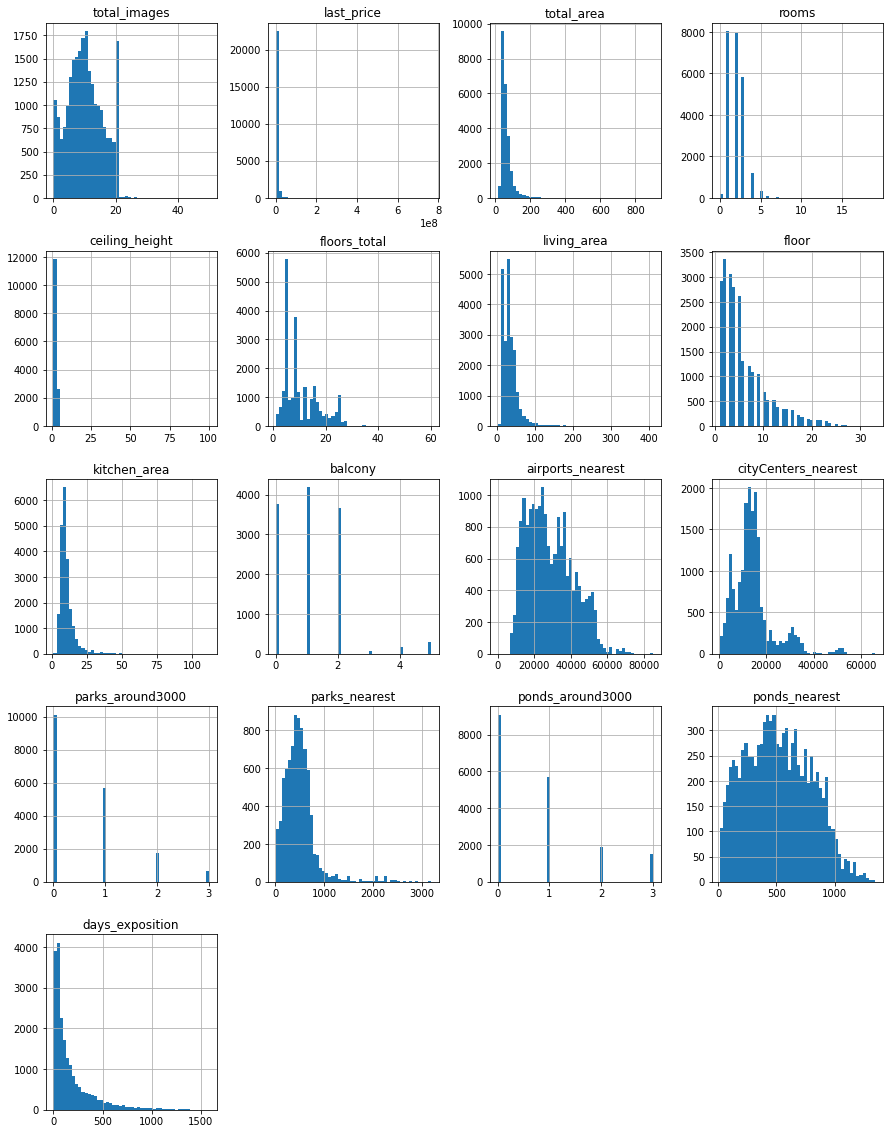

In [7]:
#вызов функции для описания данных
pd.set_option('display.max_columns', None)
data_research(data)

*Описание столбцов:*
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении;

<div class="alert alert-info"> 
    
По количеству заполненных строк можно увидеть, что в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` присутствуют пропуски. 

</div>


<div class="alert alert-info">
Не все названия столбцов записаны в едином "змеином" стиле,для удобства переименуем столбец "cityCenters_nearest", как "city_centers_nearest".
</div>


<div class="alert alert-block alert-success">

По гистограммам и описани данных видно, что столбец `last_price` имеет большой разброс цены от минимальной 12190 руб. до максимальной 763 млн.руб, возможно в данных присутсвует домик в деревне и таунхаус в центре Санкт-Петербурга? 

Данные по общей площади -`total_area` - на первый взгляд кажутся реальными, медиана - 52 кв.м, что соответствует стандартной двухкомнатной квартире. 

Количество комнат в среднем - 2, но имеются данные с количеством комнат "0", вероятно это студии. Необходимо проверить для каких типов недвижимости количество комнат равняется 0. 

В столбце `ceiling_height` имеется недвижимость с высотой потолков 100 м (и среднее с медианой сильно различаются), необходимо подробнее изучить этот столбец на наличие аномальных значений. Медианное значение количества этажей в домах - 9, что ,кажется, по Москве и Санкт-Петербургу вполне реально. 

В столбце `living_area` представлена квартира с жилой площадью - 2 кв.м, возможно в данных присутствует ошибка. 

По данным столбца `floor` можно заметить, что чем выше этаж, тем меньше представлено объявлений, что тоже кажется логичным. Большинство старых домов от 5 до 10 этажей, а вот новостройки в крупных городах уже имеют большее количество этажей, но все-таки рынок вторичного жилья в целом больше рынка новостроек (хотя зависит от населенного пункта).

В столбцах `balcony`, `parks_around3000`, `ponds_around3000` в данных присутсвует значение "0" - вероятно так обозначалось либо отсутствие информации о балконе, числе парков и прудов в радиусе 3 км, либо так обозначалось отсутствие балкона, парка и пруда.

Данные в оставшихся столбцах выглядят реально, но все они имеют пропуски, поэтому вернемся к их изучению после предобработки данных.

Столбец `total_images` не несет никакой информации и может быть удален из датафрейма.</div>

### Предобработка данных

In [8]:
#удалим столбец с количеством изображений из датафрейма
data = data.drop('total_images', axis=1)

#### Переименование столбцов

In [9]:
#приведем названия столбцов к единому виду
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
data.columns

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Удаление пропусков

In [10]:
#определяем количество пропусков с столбцах
data.isna().sum()

last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
#рассчитаем процент пропусков в каждом столбце
data.isna().mean()*100

last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [12]:
#выясним для каких населенных пунктов пропущены картографические данные
(data[(data['airports_nearest'].isna()) | (data['city_centers_nearest'].isna()) 
      | (data['parks_nearest'].isna())
      | (data['ponds_nearest'].isna())]
      ['locality_name'].unique()
)

array(['посёлок Шушары', 'городской посёлок Янино-1', 'посёлок Парголово',
       'Санкт-Петербург', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Петергоф',
       'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сла

<div style="border:solid green 2px; padding: 20 px">
    
*Большой процент незаполненных строк в столбцах с картографическими данными. По техническому заданию картографические данные заполняются не пользователем, а автоматически, и вероятнее всего информация по данному адресу отсутсвует в базе. Также легко заметить, что данные отсутствуют для небольших населенных пунктов (деревня, поселок, село, маленькие города), что опять же подтверждает предположение об отсутсвии этих данных. Поэтому несмотря на высокий высокий процент пропусков, заполнить стобцы `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` не получится.*

*Заполнять пропуски данных в столбце `floors_total` средним количеством этажей или медианным - неправильно, так как при таком способе может случиться казус: этаж, на котором расположена квартира, окажется больше этажности дома.Можно заполнить столбец этажом, на котором расположена квартира (если он указан), но так тоже можно сильно промахнуться. Оставим пока столбец с пропусками.*
</div>

In [13]:
#анализируем пропущенные значения в столбце с названием населенного пункта
data[data['locality_name'].isna()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [14]:
#пропущенных данных в столбце "locality_name"  <1%, поэтому удалим эти строки
data = data.dropna(subset=['locality_name'])

In [15]:
#проверм какие значения встречаются в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

<div style="border:solid green 2px; padding: 20 px">

*Пропуcки в столбце `is_apartment` заменим на False. Будем считать, что если данные не заполнены, то это не апартаменты.* 
</div>

In [16]:
#заменяем NaN на False в столбце "is_apartment"
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

<div style="border:solid green 2px; padding: 20 px">
    
*Пропуcки в столбцах `balcony`,  заменим на 0. Будем считать, что если данные не заполнены, то значит балкон отсуствует в квартире.* 
</div>

In [17]:
#в столбце "balcony" заменим пропуски на 0, будем считать, что если данные не указаны, то балкона нет
data['balcony'] = data['balcony'].fillna(0)

In [18]:
#проверяем заполнение столбцов
data[data['balcony'].isna()]['balcony'].count()

0

In [19]:
#проверим предположение, что столбцы с количеством прудов и парков в радиусе 3 км не заполнены для одних строк
data[(data['parks_around3000'].isna()) & (data['ponds_around3000'].isna())]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,False,False,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border:solid green 2px; padding: 20 px">
    
*Можно предположить, что если строки в колонках `parks_around3000` и `ponds_around3000` пустые, то значит количество парков (прудов) в радиусе 3 км равняется нулю.*
</div>

In [20]:
#заполняем пропуски в столбцах с количеством прудов и парков в радиусе 3 км - 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<div style="border:solid green 2px; padding: 20 px">
    
*Пропуски в столбце `days_exposition` оставим незаполнеными. Вероятнее всего они связаны с тем, что объявление еще не снято с публикации.*
    
</div>

<div style="border:solid green 2px; padding: 20 px">
    
*Проверим пропуски в столбце `rooms`. Возможно они не указаны только для студий. Если окажется, что пропуски есть и не в студиях, то изменим в столбце `studio` значение с "False" на "True"*
    
</div>

In [21]:
#найдем количество недвижимости с 0 количеством комнат
data[data['rooms'] == 0]['rooms'].count()

197

In [22]:
#проверим являются ли все они студиями
data[(data['rooms'] == 0) & (data['studio'])]['rooms'].count()

138

<div style="border:solid green 2px; padding: 20 px">

*Значит оставшиеся 59 строк не относятся к студиям. Будем считать, что при заполнении данных произошла ошибка, и квартиры случано не отнесли к категории студий.*

</div>

In [23]:
data.loc[(data['rooms'] == 0) & (~data['studio']), 'studio'] = True

In [24]:
#проверка, что все строки с количествои комнат 0 - студии
data[(data['rooms'] == 0) & (data['studio'])]['rooms'].count()

197

<div style="border:solid green 2px; padding: 20 px">
    
*Заполнение пропусков в столбцах `ceiling_height`, `kitchen_area` и `living_area` связано с большим количеством внешних факторов. Допустим, высота потолков может зависеть от года постройки дома (хрущевка - 2,4 м; брежневка - 2,6 - 2,7 м; новостройка эконом-класса от 2,6-2,8 м и т.д.), от «элитности» дома (в бизнесс-классе будет от 2,75 м), от фирмы-застройщика (у каждого имеются свои типовые проекты домов). Аналогично площадь кухни и жилая площадь будет для каждого ЖК своя в зависимости от количества комнат и типовой планировки, а в домах бизнесс-класса планировка вообще может быть свободная.*

*Попробуем заменить пропуски в высоте потолков медианным значением в зависимости от площади квартиры. Кухонную площадь заполним в зависимости от общей площади (столбец `total_area`, к счастью, не имеет пропусков), как `total_area`*0.9 - `living_area` (примем коэффициент 0.9, чтобы 10% площади оставить под технические помещения). Аналогично заполним жилую площадь `total_area`*0.9 - `kitchen_area`.*
    
</div>

In [25]:
#проверим, что в заполненных столбцах сумма living_area + kitchen_area не превышает 90%
(((data['living_area'] + data['kitchen_area'])*100 / data['total_area'])>90).sum()

462

In [26]:
#выведем строки с площадью жилая+кухня > 90%
data[((data['living_area'] + data['kitchen_area'])*100 / data['total_area'])>90]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,False,False,False,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.1,5,False,False,False,6.2,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,28.0,6,False,False,False,9.0,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.4,4,False,False,False,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,90.2,4,False,False,False,16.0,0.0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,42.2,2,False,False,False,6.0,1.0,Высоцк,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23328,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,40.0,8,False,False,False,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,44.0,2,False,False,False,15.3,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [27]:
#строки, где сумма площади кухни и жилой > 100% 
data[((data['living_area'] + data['kitchen_area'])*100 / data['total_area'])>100]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,False,False,6.20,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,False,False,5.00,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,False,False,9.28,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0
601,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,False,False,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,False,False,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,False,False,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,0.0,NaN,0.0,NaN,NaN
21868,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,False,False,False,8.00,2.0,Сосновый Бор,NaN,NaN,0.0,NaN,0.0,NaN,107.0
21915,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,False,False,False,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,False,False,False,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


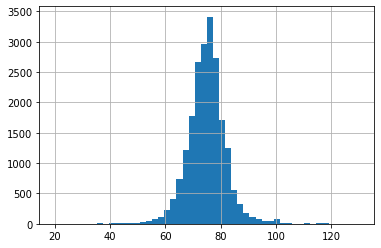

In [28]:
#построим гистограмму доли площади (жилая+кухня) от общей площади
((data['living_area'] + data['kitchen_area'])*100 / data['total_area']).hist(bins=50, range=(20,130))
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
*Перед тем как заполнять недостающие значения в столбцах `living_area` и `kitchen_area` исправим строки, где отношение жилой/общей площади > 90%.*

</div>

#### Устранение редких и выбивающихся значений

In [29]:
#создаем временный датафрейм для обработки значений, где сумма жилой и кухонной площади > 90%
#и где жилая площадь > 0.9*total_area
data_temporary = data.loc[((data['living_area'] + data['kitchen_area']) / data['total_area'] > 0.9) | \
                          (data['living_area'] / data['total_area']> 0.9)]
#удаляем эти строки их исходного датафрейма
data = data.drop(data[((data['living_area'] + data['kitchen_area']) / data['total_area'] > 0.9) | \
                          (data['living_area'] / data['total_area']> 0.9)].index)

In [30]:
#заменяем жилую площадь исходя из отношения 
#новая суммарная площадь(0.9*total_area) / старая суммарная площадь(livig+kitchen)
data_temporary['living_area'] = round(data_temporary['living_area'] * data_temporary['total_area']*0.9 / (data_temporary['living_area'] + data_temporary['kitchen_area']),1)

In [31]:
#заменяем кхонную площадь исходя из отношения 
#новая суммарная площадь(0.9*total_area) / старая суммарная площадь(livig+kitchen)
data_temporary['kitchen_area'] = round(data_temporary['kitchen_area'] * data_temporary['total_area']*0.9 / (data_temporary['living_area'] + data_temporary['kitchen_area']),1)

In [32]:
#вывод временного датафрейма
data_temporary

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,55.3,8,False,False,False,11.9,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,34.9,8,False,False,False,9.8,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,22.0,5,False,False,False,6.0,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25.0,25.2,6,False,False,False,8.8,0.0,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5.0,47.3,4,False,False,False,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,87.1,4,False,False,False,15.9,0.0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,38.0,2,False,False,False,5.9,1.0,Высоцк,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23328,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,38.9,8,False,False,False,9.9,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,43.4,2,False,False,False,15.2,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


In [33]:
#присоединяем обработанный дф data_temporary к data
pd.concat([data, data_temporary], ignore_index=True)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,10150000.0,114.0,2015-01-21T00:00:00,4,NaN,5.0,87.1,4,False,False,False,15.9,0.0,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23646,1850000.0,48.2,2019-03-13T00:00:00,2,NaN,5.0,38.0,2,False,False,False,5.9,1.0,Высоцк,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23647,4299000.0,54.0,2016-11-25T00:00:00,2,NaN,14.0,38.9,8,False,False,False,9.9,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23648,8500000.0,65.0,2018-11-01T00:00:00,2,NaN,4.0,43.4,2,False,False,False,15.2,0.0,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


##### Удаление пропусков. Продолжение

In [34]:
#заполяем пустые строки в жилой площади, как total_area*0.9 - kitchen_area
data.loc[data['living_area'].isna(), 'living_area'] = round(data.loc[data['living_area'].isna(), 'total_area']*0.9 \
- data.loc[data['living_area'].isna(), 'kitchen_area'],1)

In [35]:
#заполяем пустые строки в площади кухни, как total_area*0.9 - living_area
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = round(data.loc[data['kitchen_area'].isna(), 'total_area']*0.9 \
- data.loc[data['kitchen_area'].isna(), 'living_area'],1)

In [36]:
#проверка наличия отрицательных площадей после подстановки
data[(data['living_area']<0) | (data['kitchen_area']<0)].sort_values(by='kitchen_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [37]:
#проверим процент пропусков в столбцах
data.isna().mean()*100

last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.782203
floors_total             0.362491
living_area              6.300436
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             6.300436
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.324559
city_centers_nearest    23.225305
parks_around3000         0.000000
parks_nearest           65.964700
ponds_around3000         0.000000
ponds_nearest           61.610495
days_exposition         13.390584
dtype: float64

<div style="border:solid green 2px; padding: 20 px">

*В солбцах `kitchen_area` и `living_area` все еще остались незаполненные строки, значит значения отсутсвуют и в столбце `living_area`, и в `kitchen_area`. Найдем, в каком соотношении в среднем делятся жилая и кухонная площади, и присвоим недостающие площади с учетом найденного отношения.*
</div>

In [38]:
#найдем среднее отношение площадей 
area_relative = round((data.loc[: , 'living_area'] / data.loc[:,'kitchen_area']).mean(), 2)
area_relative

3.65

In [39]:
#замена пустых значений в столбце kitchen_area из системы уравнений
#living_area/kitchen_area=area_relative
#living_area+kitchen_area=0.9*total_area
data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna()), 'kitchen_area'] = \
data.loc[(data['kitchen_area'].isna()) & (data['living_area'].isna()), 'total_area'] * 0.9 / (area_relative + 1)

In [40]:
data.loc[(data['living_area'].isna()), 'living_area'] = \
data.loc[data['living_area'].isna(), 'kitchen_area'] * area_relative

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23173.0,6.504330e+06,1.085379e+07,12190.0,3405000.00,4600000.00,6750000.0,763000000.0
total_area,23173.0,6.020310e+01,3.550449e+01,12.0,40.00,52.00,69.5,900.0
rooms,23173.0,2.065507e+00,1.076052e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14186.0,2.759888e+00,9.335417e-01,1.0,2.51,2.65,2.8,32.0
floors_total,23089.0,1.069873e+01,6.585517e+00,1.0,5.00,9.00,16.0,60.0
living_area,23173.0,3.499118e+01,2.302610e+01,2.0,19.00,30.30,42.7,507.9
floor,23173.0,5.901308e+00,4.879708e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,23173.0,1.067433e+01,6.302708e+00,0.1,7.00,9.20,12.0,192.0
balcony,23173.0,5.918957e-01,9.590160e-01,0.0,0.00,0.00,1.0,5.0
airports_nearest,17768.0,2.883108e+04,1.266269e+04,0.0,18557.00,26785.50,37364.0,84869.0


In [42]:
#проверяем наличие пустых строк
data.loc[data['living_area'].isna()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [43]:
#проверим процент пропусков в столбцах
data.isna().mean()*100

last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.782203
floors_total             0.362491
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.324559
city_centers_nearest    23.225305
parks_around3000         0.000000
parks_nearest           65.964700
ponds_around3000         0.000000
ponds_nearest           61.610495
days_exposition         13.390584
dtype: float64

#### Изменение типов данных

In [ ]:
#столбцы "last_price", "balcony" исходя из логики (количество балконов и цена на квартиры обычно целые числа) 
#переведем в целочисленный тип данных
#при изучении датафрейма было решено изменить тип данных для столбца "is_apartment" на булевый
data = data.astype({ "last_price": "int", "balcony": "int", "is_apartment":"bool"})

In [45]:
#проверка типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23173 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23173 non-null  float64
 1   total_area            23173 non-null  float64
 2   first_day_exposition  23173 non-null  object 
 3   rooms                 23173 non-null  int64  
 4   ceiling_height        14186 non-null  float64
 5   floors_total          23089 non-null  float64
 6   living_area           23173 non-null  float64
 7   floor                 23173 non-null  int64  
 8   is_apartment          23173 non-null  bool   
 9   studio                23173 non-null  bool   
 10  open_plan             23173 non-null  bool   
 11  kitchen_area          23173 non-null  float64
 12  balcony               23173 non-null  float64
 13  locality_name         23173 non-null  object 
 14  airports_nearest      17768 non-null  float64
 15  city_centers_neares

<div class="alert alert-info">Можно изменить тип данных следующих столбцов на int64, так как часть данных (картографические) представлена в целочисленном виде, другая часть данных по определению не может быть с дробной частью, например, общее количество этажей и количество дней размещения объявления:
    
- `floors_total`;
    
- `airports_nearest`;
    
- `city_сenters_nearest`;
    
- `parks_around3000`;
    
- `parks_nearest`;
    
- `ponds_around3000`;
    
- `ponds_nearest` ;
    
- `days_exposition`.
    
Поскольку в данных столбцах присутсвуются пропуски NaN, то преобразовать в целочисленный тип нельзя. Избежать данной ошибки можно заменив все Nan на какое-либо число (допустим, -1) или удалив строки со значениями NaN. Удалить строки с пропусками в картографических данных не можем (так как высокая доля строк с незаполненными значениями -> потеряем большое количество данных). Не будем прибегать к замене NaN числом, чтобы избежать путаницы в дальнейшем. Продолжим работу с числам с плавающей запятой.
   </div>

In [46]:
#переведем дату в специальный тип
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

<div style="border:solid green 2px; padding: 20 px">

*В столбце `is_apartment` изменили строковый тип object на bool, так как в столбце содержались два варианта значений - "False" и "True".*

*Столбцы `last_price`, `balcony` перевели в целочисленный тип данных, потому что количество балконов и стоимость квартиры принято представлять целыми числами.*

*Изменять тип в картографических данных не стали, поскольку колонки содержат много пропусков, и чтобы в дальнейшем избежать путаницы оставили исходный тип данных - float.
    Столбец с датой `first_day_exposition` перевели в специальный тип, удобный в дальнейшем для работы.* 
</div>

#### Удаление явных дубликатов

In [47]:
# удаление явных дубликатов
data = data.drop_duplicates()

In [48]:
# проверка на отсутствие дубликатов
data.duplicated().sum()

0

#### Удаление неявных дубликатов

In [49]:
#выведем уникальные названия населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [50]:
#количество уникальных населенных пунктов
data['locality_name'].nunique()

362

<div style="border:solid green 2px; padding: 20 px">
    
*Бросается в глаза различное написание поселка: где-то через "е", где-то через "ё". Заменим все на букву "е".*
    
</div>

In [51]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

<div style="border:solid green 2px; padding: 20 px">
Приведем все к нижнему регистру и удалим дубликаты.
</div>

In [52]:
#приведение к нижнему регистру и удаление дубликатов
data['locality_name_lower'] = data['locality_name'].str.lower()
data_col = list(data.columns)
data.drop_duplicates(subset = data_col.remove('locality_name'))
#удалим столбец locality_name_lower
data = data.drop('locality_name_lower', axis=1)

In [53]:
# Проверка на неявные дубликаты
data['locality_name'].nunique()

328

In [54]:
#удалим лишние слова в названиях населенных пунктов, разобъем строку методом split(), 
#проверим наличие в списке лишних слов (слова указывающие на тип населенного пункта удаляются, остается только собственное название
#склеим оставшиеся слова обратно join()
restricted_words = ('поселок', 'город', 'село', 'деревня', 'городского', 'городской', 'типа','станции', 'коттеджный', 'садовое', 'товарищество', 'при', 'железнодорожной','имени','садоводческое', 'некоммерческое')

for i in data.index:
    data.loc[i, 'locality_name_new'] = ' '.join([el for el in data.loc[i, 'locality_name'].split() if el not in restricted_words]
)

In [55]:
#создание словаря, где ключ - собственное название населенного пункта, 
#значение - наиболее длинное название населенного пункта в датафрейме
names = list(data['locality_name'].values)
names_dict = {}
for name in names:
    key = ' '.join([el for el in name.split() if el not in restricted_words])
    if key not in names_dict:
        names_dict[key] = name
    else:
        if len(names_dict[key]) > len(name):
            names_dict[key] = names_dict[key]
        else:
            names_dict[key] = name
print(names_dict)

{'Санкт-Петербург': 'Санкт-Петербург', 'Шушары': 'поселок Шушары', 'Янино-1': 'городской поселок Янино-1', 'Парголово': 'поселок Парголово', 'Мурино': 'поселок Мурино', 'Ломоносов': 'Ломоносов', 'Сертолово': 'Сертолово', 'Петергоф': 'Петергоф', 'Пушкин': 'Пушкин', 'Кудрово': 'деревня Кудрово', 'Коммунар': 'Коммунар', 'Колпино': 'Колпино', 'Красный Бор': 'поселок городского типа Красный Бор', 'Гатчина': 'Гатчина', 'Федоровское': 'городской поселок Федоровское', 'Выборг': 'Выборг', 'Кронштадт': 'Кронштадт', 'Кировск': 'Кировск', 'Новое Девяткино': 'деревня Новое Девяткино', 'Металлострой': 'поселок Металлострой', 'Лебяжье': 'поселок городского типа Лебяжье', 'Сиверский': 'поселок городского типа Сиверский', 'Молодцово': 'поселок Молодцово', 'Кузьмоловский': 'поселок городского типа Кузьмоловский', 'Новая Ропша': 'садовое товарищество Новая Ропша', 'Павловск': 'Павловск', 'Пикколово': 'деревня Пикколово', 'Всеволожск': 'Всеволожск', 'Волхов': 'Волхов', 'Кингисепп': 'Кингисепп', 'Приозерск

In [56]:
#замена по ключу имени в столбце locality_name_new
data = data.replace({'locality_name_new':names_dict})

In [57]:
#удалим повторяющиеся строки
data_col = list(data.columns)
data.drop_duplicates(subset = data_col.remove('locality_name'))

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
0,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок Шушары
2,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,64900000.0,159.00,2015-07-24,3,NaN,14.0,112.325806,9,False,False,False,30.774194,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,False,False,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,Санкт-Петербург
23695,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,False,False,8.500000,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,Тосно
23696,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,False,False,21.300000,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,село Рождествено
23697,11475000.0,76.75,2017-03-28,2,3.00,17.0,45.800000,12,False,False,False,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Санкт-Петербург


In [58]:
#проверка количества уникальных значений в столбце locality_name_new
data['locality_name_new'].nunique()

303

<div style="border:solid green 2px; padding: 20 px">
    
*Таким образом, в результате обработки было исправлено 59 неявных дубликатов в столбце с названиями населенных пунктов. Количество уникальных названий населенных пунктов составляет 303.*
    
</div>

#### Редкие и выбивающиеся значения

<AxesSubplot:>

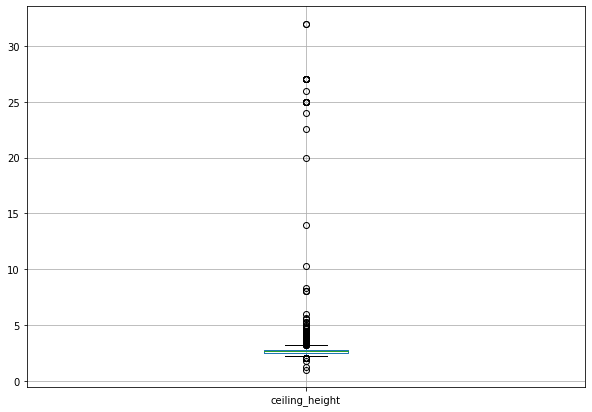

In [59]:
#построим диаграмму размаха для высоты потолков
data.boxplot(column='ceiling_height', figsize=(10,7))

<div style="border:solid green 2px; padding: 20 px">
    
*На диаграмме много выбросов, расположенных за "усами". Логично, что высота потолка не может быть 25 м и выше. Скорее всего, произошла ошибка при заполнении данных, поделим значения > 25 м на 10.*

</div>

<AxesSubplot:>

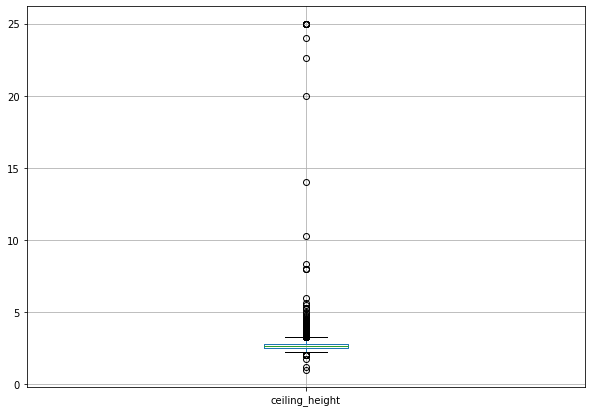

In [60]:
data.loc[data['ceiling_height']>25, 'ceiling_height'] = data.loc[data['ceiling_height']>25, 'ceiling_height']/10
#проверка изменений на диаграмме размаха
data.boxplot(column='ceiling_height', figsize=(10,7))

In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23173.0,6.504330e+06,1.085379e+07,12190.0,3405000.00,4600000.00,6750000.0,763000000.0
total_area,23173.0,6.020310e+01,3.550449e+01,12.0,40.00,52.00,69.5,900.0
rooms,23173.0,2.065507e+00,1.076052e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14186.0,2.742187e+00,6.501035e-01,1.0,2.51,2.65,2.8,25.0
floors_total,23089.0,1.069873e+01,6.585517e+00,1.0,5.00,9.00,16.0,60.0
living_area,23173.0,3.499118e+01,2.302610e+01,2.0,19.00,30.30,42.7,507.9
floor,23173.0,5.901308e+00,4.879708e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,23173.0,1.067433e+01,6.302708e+00,0.1,7.00,9.20,12.0,192.0
balcony,23173.0,5.918957e-01,9.590160e-01,0.0,0.00,0.00,1.0,5.0
airports_nearest,17768.0,2.883108e+04,1.266269e+04,0.0,18557.00,26785.50,37364.0,84869.0


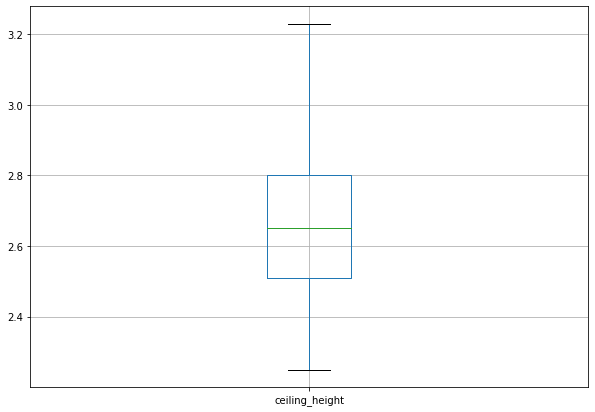

In [62]:
#смотрим границу "усов"
data.boxplot(column='ceiling_height', figsize=(10,7), showfliers=False);

In [63]:
#процент аномальных значений в высоте потолков
((data['ceiling_height']>3.1) | (data['ceiling_height']<2.2)).mean()*100

5.04466404867734

##### Удаление пропусков. Продолжение

In [64]:
#допустим, что максимальная высота потолков для элитного жилья - 8 м 
#минимальную высоту потолков примем 2
#заменим для жилья с общей площадью < 100 и высотой потолков выше 3.6 м аномальные значения на медианное
data.loc[((data['ceiling_height']>3.6) | (data['ceiling_height']<2)) & (data['total_area']<100),'ceiling_height'] = data['ceiling_height'].median()

In [65]:
#заменим высоту потолков на медианное значение по 4 группам, принцип разбиения - значение общей площади по квартилям (1, 2 и 3-го)
#первый квартиль для колонки total_area - 40 кв.м.
data.loc[(data['total_area']<40) & (data['ceiling_height'].isna()),'ceiling_height'] = data.loc[(data['total_area']<40) & (~data['ceiling_height'].isna()), 'ceiling_height'].median()
print(data.loc[(data['total_area']<40) & (~data['ceiling_height'].isna()), 'ceiling_height'].median())

2.6


In [66]:
#второй квартиль для колонки total_area - 52 кв.м.
data.loc[( data['total_area'].between(40,52)) & (data['ceiling_height'].isna()),'ceiling_height'] \
= data.loc[ data['total_area'].between(40,52), 'ceiling_height'].median()
print(data.loc[(data['total_area'].between(40,52)), 'ceiling_height'].median())

2.6


In [67]:
#третий квартиль для колонки total_area - 69.5 кв.м.
data.loc[( data['total_area'].between(52,69.5)) & (data['ceiling_height'].isna()),'ceiling_height'] \
= data.loc[ data['total_area'].between(52,69.5), 'ceiling_height'].median()
print(data.loc[(data['total_area'].between(52,69.5)), 'ceiling_height'].median())

2.6


In [68]:
#максимальное значение колонки total_area - 900 кв.м.
data.loc[( data['total_area'].between(69.5,900)) & (data['ceiling_height'].isna()),'ceiling_height'] \
= data.loc[ data['total_area'].between(69.5,900), 'ceiling_height'].median()
print(data.loc[(data['total_area'].between(69.5,900)), 'ceiling_height'].median())

2.8


<AxesSubplot:>

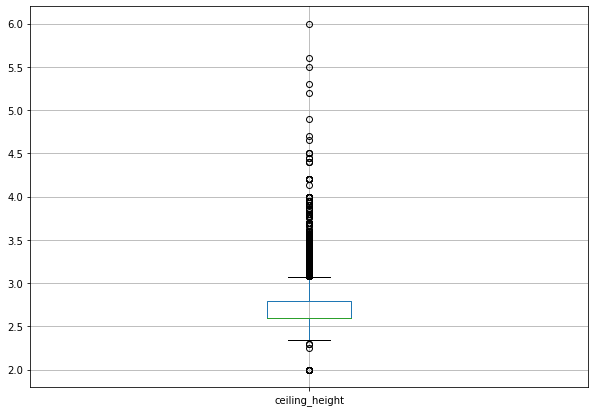

In [69]:
#проверка изменений на диаграмме размаха
data.boxplot(column='ceiling_height', figsize=(10,7))

##### Редкие и выбивающиеся значения. Продолжение

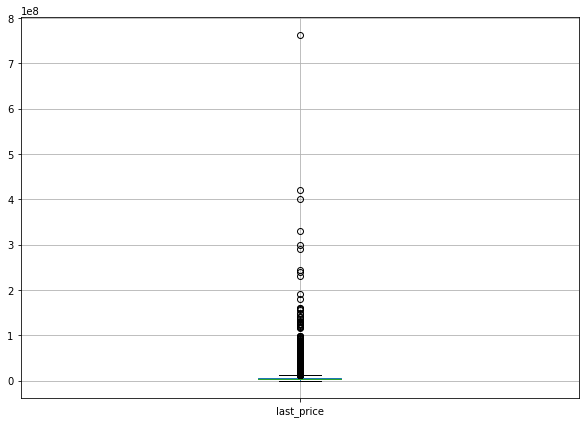

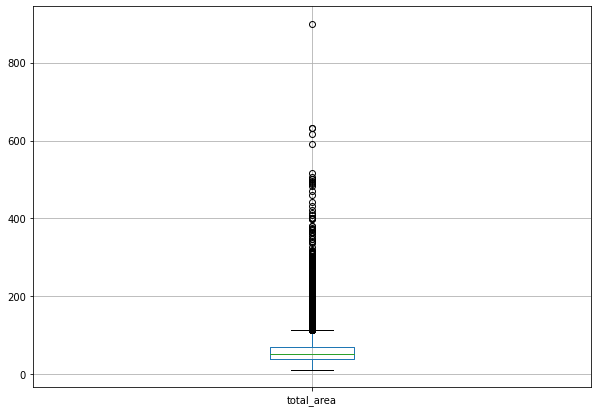

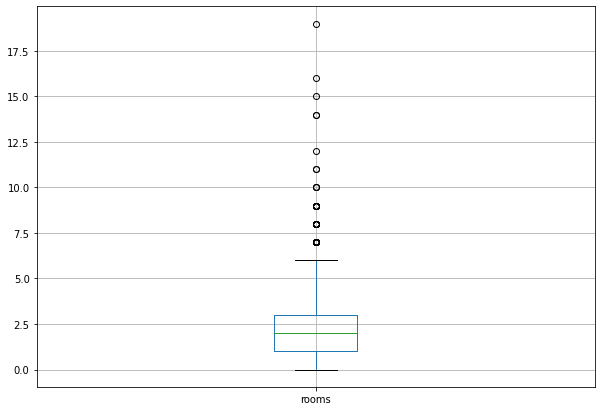

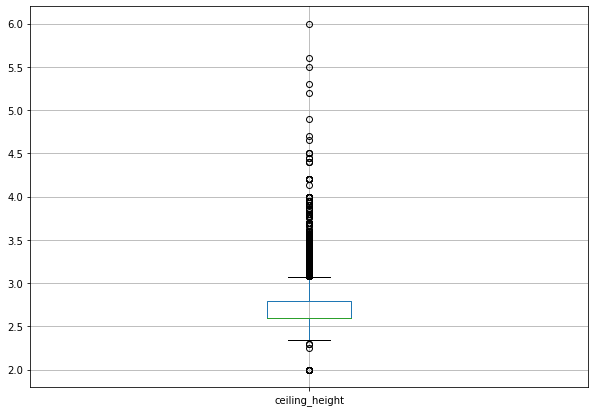

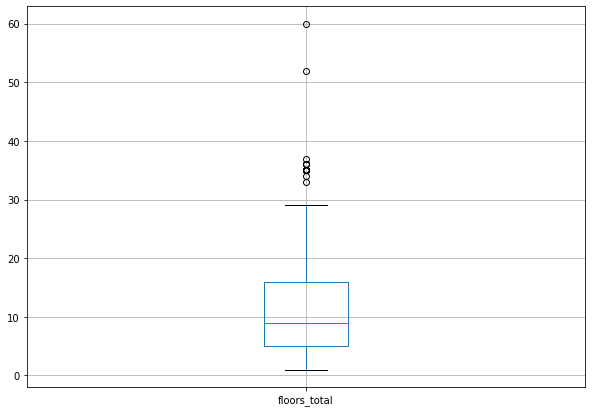

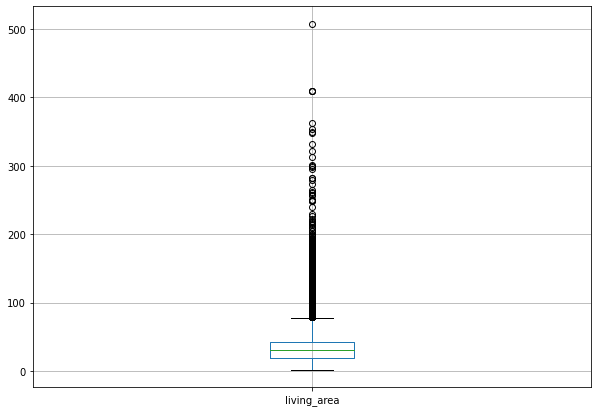

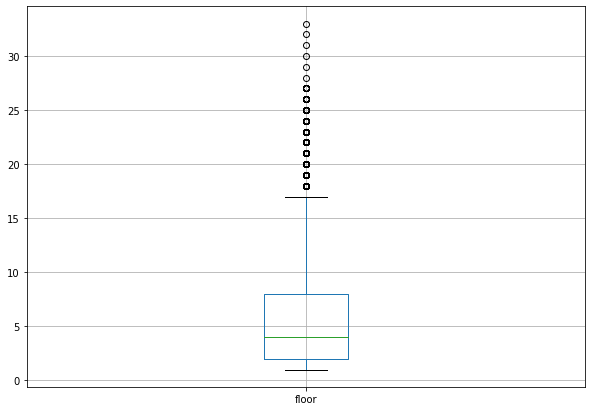

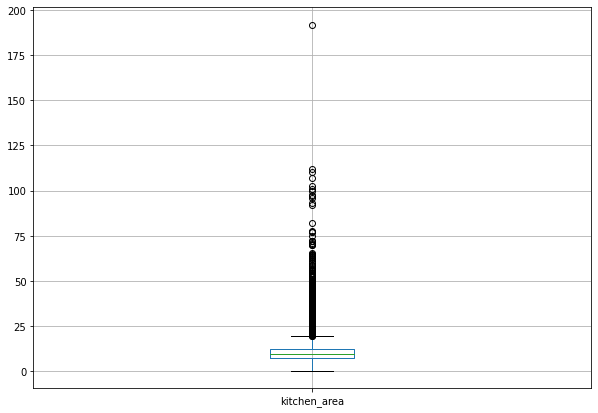

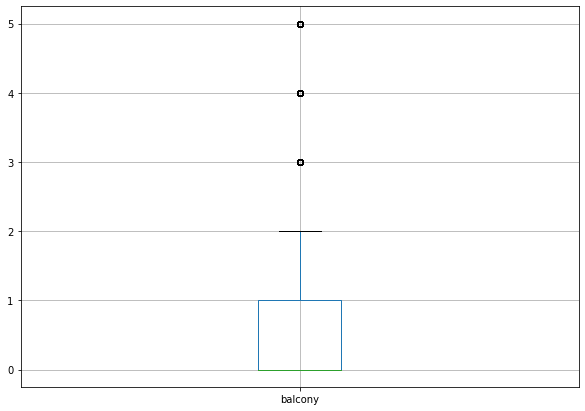

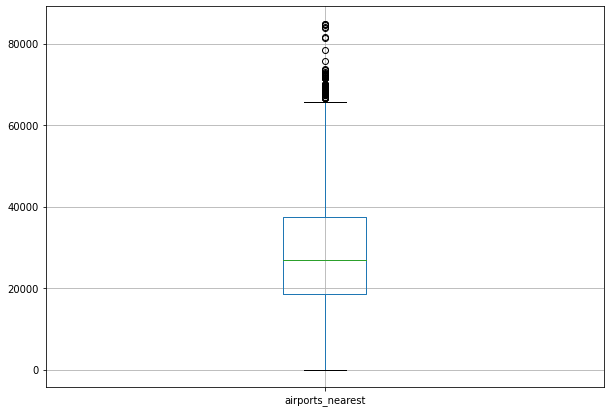

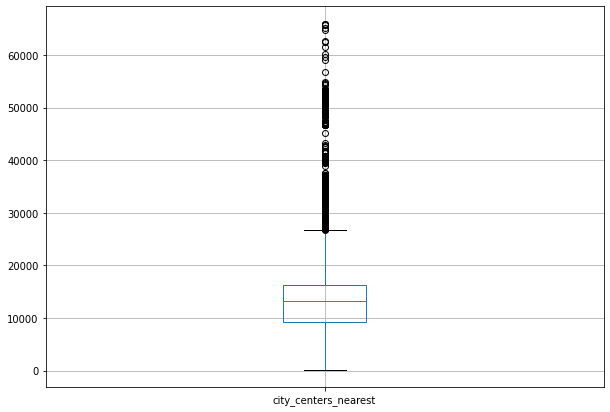

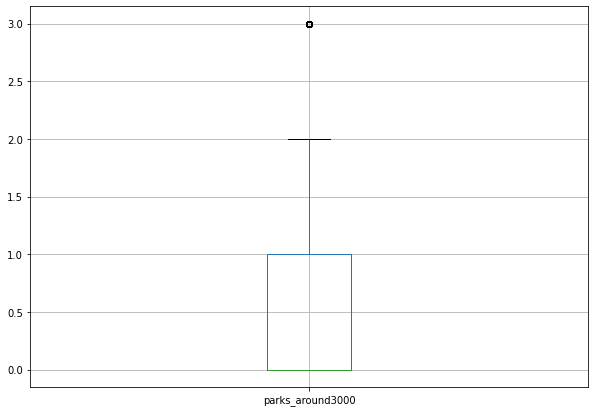

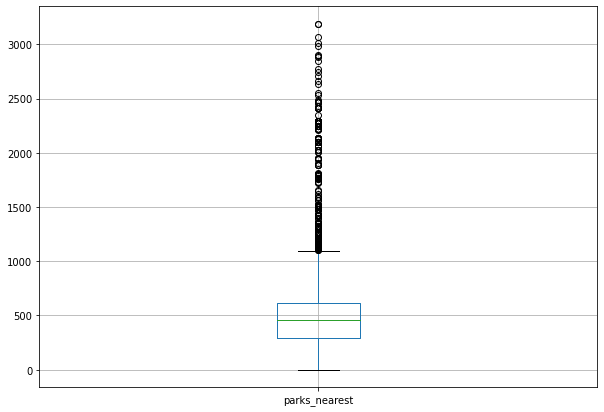

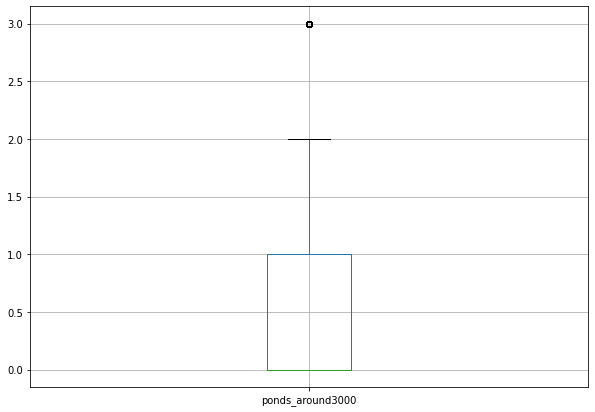

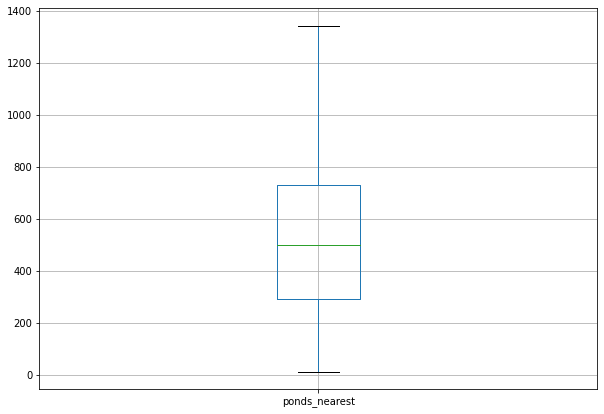

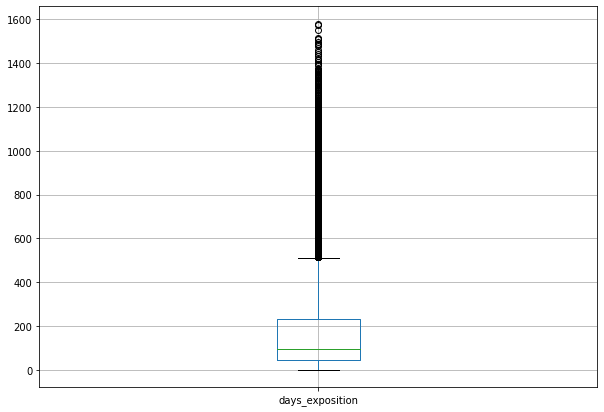

In [70]:
#построим диаграмму размаха для остальных столбцов
for i in list(data.columns):
    if data[i].dtype.name in ('int64', 'float64'):
        data.boxplot(column=i, figsize=(10,7))
        plt.show()

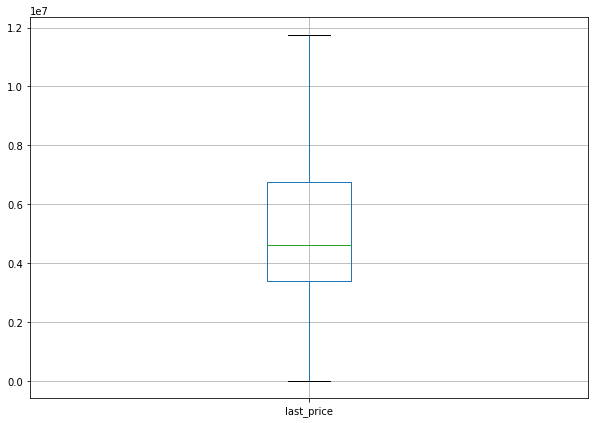

In [71]:
#смотрим границу "усов" для столбца last_price
data.boxplot(column='last_price', figsize=(10,7), showfliers=False);

In [72]:
#проверим квартиры с ценой меньше 500000 тыс.руб.
data[data['last_price'] < 500000]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
5698,450000.0,42.0,2017-07-31,2,2.60,1.0,23.000000,1,False,False,False,5.800000,0.0,городской поселок Будогощь,NaN,NaN,0.0,NaN,0.0,NaN,233.0,городской поселок Будогощь
6859,490000.0,40.0,2017-12-11,1,2.60,5.0,28.258065,3,False,False,False,7.741935,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,43.0,деревня Старополье
8793,12190.0,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,False,False,40.500000,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург
9581,450000.0,43.4,2018-08-31,2,2.60,5.0,30.300000,3,False,False,False,5.500000,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,96.0,деревня Старополье
10782,490000.0,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,False,False,5.500000,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,719.0,Сланцы
14911,430000.0,54.0,2018-06-26,2,2.60,3.0,38.148387,3,False,False,False,10.451613,0.0,поселок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0,поселок станции Свирь
16032,480000.0,32.0,2019-01-06,1,2.60,2.0,16.000000,1,False,False,False,12.800000,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,83.0,Сланцы
16219,450000.0,38.5,2018-07-11,2,2.65,2.0,27.198387,1,False,False,False,7.451613,0.0,деревня Вахнова Кара,NaN,NaN,0.0,NaN,0.0,NaN,45.0,деревня Вахнова Кара
16274,440000.0,40.0,2018-07-10,1,2.60,5.0,28.258065,1,False,False,False,7.741935,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0,деревня Старополье
17456,430000.0,30.4,2019-04-22,1,2.60,2.0,16.000000,1,False,False,False,6.000000,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Сланцы


In [73]:
#поверим населенный пункт для квартир стоимостью меньше 500000 тыс.руб.
data.query('last_price<500000')['locality_name_new'].unique()

array(['городской поселок Будогощь', 'деревня Старополье',
       'Санкт-Петербург', 'Сланцы', 'поселок станции Свирь',
       'деревня Вахнова Кара', 'деревня Ям-Тесово', 'поселок Совхозный'],
      dtype=object)

<div style="border:solid green 2px; padding: 20 px">
    
*Видно, что большая часть квартир стоимостью меньше 500 тыс.руб. расположена в поселках, деревнях и пограничных гороках. Общая площадь не превышает 54 кв.м., значит это реальные цены на данные квартиры.*

*Выбивается квартира, расположенная в Санкт-Петербурге, у нее большая общая площадь - 109 кв.м., и самая низкая цена - 12190 руб.* 
</div>

In [74]:
#проверим квартиры с ценой меньше 100000 рублей
data[data['last_price'] < 100000]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
8793,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург


In [75]:
#удалим строку с аномальным значением цены, квартира в Санкт-Петербурге с общей площадью 109 кв.м. не может стоит 12190
data.drop(data[data['last_price'] < 100000].index, inplace=True)

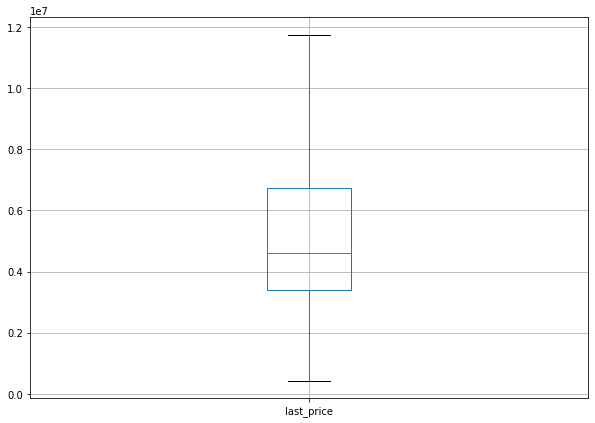

In [76]:
#смотрим границу "усов" для стоимости квартир
data.boxplot(column='last_price', figsize=(10,7), showfliers=False);

In [77]:
#рассмотрим квартиры стоимостью выше 100 млн.руб, так как такие квартиры выделяют на фоне остальных
data.query('last_price>100000000').sort_values(by='total_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
4996,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.200000,2,False,False,False,20.000000,0.0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,Санкт-Петербург
16647,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.000000,2,False,False,False,72.000000,0.0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,Санкт-Петербург
17912,135000000.0,166.0,2019-02-07,3,3.30,7.0,52.000000,1,False,False,False,64.000000,0.0,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,NaN,Санкт-Петербург
22831,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.700000,6,False,False,False,30.200000,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,Санкт-Петербург
20264,119000000.0,187.6,2017-07-10,4,6.00,7.0,147.000000,7,False,False,False,15.600000,0.0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,Санкт-Петербург
1436,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.000000,5,False,False,False,40.000000,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург
1928,125000000.0,224.5,2017-01-24,4,2.80,4.0,163.500000,3,False,False,False,30.000000,1.0,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0,Санкт-Петербург
13864,130000000.0,231.0,2015-08-13,6,3.60,6.0,148.000000,4,False,False,False,12.000000,0.0,Санкт-Петербург,22992.0,1280.0,3.0,395.0,3.0,170.0,467.0,Санкт-Петербург
21923,115490000.0,235.0,2017-04-09,5,4.90,5.0,140.000000,5,False,False,False,50.000000,0.0,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0,Санкт-Петербург
12674,140000000.0,241.0,2015-07-24,5,3.00,5.0,170.254839,4,False,False,False,46.645161,0.0,Санкт-Петербург,23512.0,3503.0,3.0,413.0,3.0,83.0,399.0,Санкт-Петербург


In [78]:
#найдем медианную площадь для  квартир с ценой выше 100 млн.руб.
data.query('last_price > 100000000')['total_area'].median()

280.0

In [79]:
#найдем населенные пункты, где расположены квартиры с ценой выше 100 млн.руб.
data.query('last_price > 100000000')['locality_name_new'].unique()

array(['Санкт-Петербург'], dtype=object)

<div style="border:solid green 2px; padding: 20 px">
    
*По данным видно, что квартиры стоимостью более 100 млн.руб. имеют медианную площадь 280 кв.м. и расположены только в Санкт-Петербурге. Очевидно, что это реальные цены для недвижимости бизнес-класса. Но так как занчения встречаются редко, то данные строки включать в исследование не будем.*

</div>

<AxesSubplot:xlabel='total_area', ylabel='rooms'>

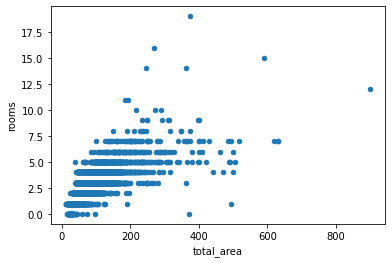

In [80]:
#поверим, зависимость количества комнат от площади
data.plot(x='total_area', y='rooms', kind='scatter') 

In [81]:
import warnings
warnings.filterwarnings("ignore")

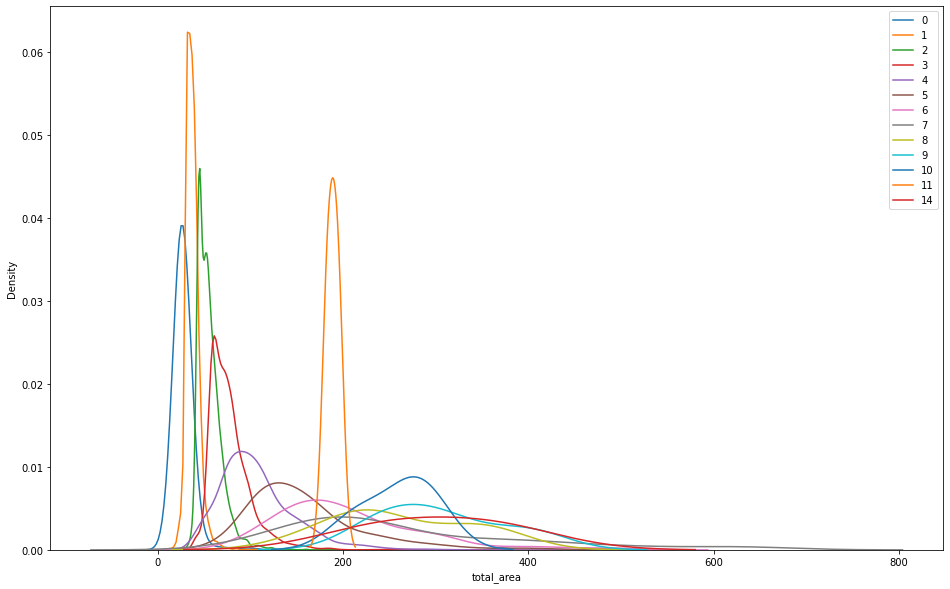

In [82]:
#отобразим зависимость на графике
plt.figure(figsize=(16,10))
for group, group_data in data.groupby('rooms'):
    sns.kdeplot(group_data['total_area'], label=group)
plt.legend()

In [83]:
#проверим строку с общей площадью около 400 кв.м и 0 комнатами
data.query('rooms==0 and total_area>300')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
19392,71000000.0,371.0,2018-07-26,0,3.57,7.0,262.093548,6,False,True,True,71.806452,0.0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,Санкт-Петербург


<div style="border:solid green 2px; padding: 20 px">
    
*Это студия. Не будем считать данную строку аномалией.*

</div>

In [84]:
#проверим строки с большим количеством комнат, они явно выделяются на фоне остальных
data.query('rooms>7')[['last_price','total_area','rooms','is_apartment','studio']].sort_values(by='rooms')

,last_price,total_area,rooms,is_apartment,studio
21990,68000000.0,373.1,8,False,False
813,16500000.0,229.0,8,False,False
20788,18000000.0,245.0,8,False,False
4435,22190000.0,191.2,8,False,False
19865,180000000.0,347.0,8,False,False
8758,16100000.0,150.0,8,False,False
18945,15800000.0,236.4,8,False,False
17203,35300000.0,235.0,8,False,False
10569,36900000.0,347.5,8,False,False
11436,24000000.0,316.3,8,False,False


<div style="border:solid green 2px; padding: 20 px">
    
*По графикам видно, что для количество комнат >7 данные разбросаны, то есть не соблюдается зависимость, что при увеличении площади увеличивается и количество комнат.Например, 14 комнат встречаются для общей площади 363 кв.м. и для общей площади 245.4 кв.м. Разница в площадях слишком большая(~120 кв.м.). Такие строки будут загрязнять графики при исследовании взаимосвязей. При исследовании будем рассматривать квартиры с количеством комнат до 7.*

</div>

In [85]:
#проверим строки с минимальным значением комнат и большИм количеством балконов
data.query('balcony > rooms')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
1,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок Шушары
40,3590000.0,36.0,2017-03-15,1,2.60,26.0,15.0,22,False,False,False,10.0,2.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,430.0,поселок Парголово
42,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,Петергоф
53,4300000.0,39.1,2017-11-10,1,2.60,25.0,15.4,13,False,False,False,15.5,2.0,поселок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0,поселок Парголово
56,4350000.0,41.0,2016-03-28,1,2.80,7.0,18.1,4,False,False,False,11.1,2.0,Санкт-Петербург,13772.0,9626.0,1.0,271.0,1.0,439.0,152.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23671,3450000.0,35.3,2017-04-14,1,2.50,9.0,17.5,4,False,False,False,7.5,2.0,Санкт-Петербург,21435.0,15261.0,1.0,334.0,1.0,232.0,21.0,Санкт-Петербург
23673,3100000.0,23.0,2018-03-19,1,2.80,9.0,12.6,1,False,False,False,5.0,2.0,Санкт-Петербург,11813.0,11881.0,1.0,262.0,1.0,442.0,41.0,Санкт-Петербург
23682,2350000.0,35.6,2016-06-23,1,2.50,5.0,17.0,4,False,False,False,8.3,2.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,40.0,Выборг
23687,3200000.0,39.0,2017-12-16,1,2.60,9.0,20.0,6,False,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,Санкт-Петербург


In [86]:
#для строк, где количество балконов превышает количество комнат, заменим количество балконов количеством комнат
data.loc[data['balcony'] > data['rooms'],'balcony'] = data.loc[data['balcony'] > data['rooms'],'rooms']

In [87]:
#проверим строки с минимальным значением комнат и большим количеством балконов
data.query('balcony > rooms')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new


In [88]:
#проверим квартиры с этажностью дома > 40
data.query('floors_total > 40')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
2253,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,False,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт
16731,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург


In [89]:
#строка с количеством этажей 60 в Крондшадте выглядит подозрительно
#заменим этажность дома в Кронштадте на среднюю по городу
data.loc[data['floors_total']==60, 'floors_total'] = data.loc[data['locality_name']=='Кронштадт', 'floors_total'].median()

In [90]:
#проверяем замену этажности дома
data.query('floors_total > 40')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
16731,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,False,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Санкт-Петербург


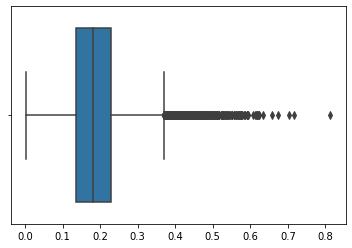

In [91]:
#построим диаграмму размаха для отношения кухонной площади к общей
sns.boxplot(x=(data['kitchen_area']/data['total_area']))
sns.set(rc={'figure.figsize':(20,10)})
plt.show()


In [92]:
#квартиры с отношением кухонная площадь/общая площадь > 0.5 выглядят как аномальные значения
data.query('kitchen_area/total_area>0.5 and not studio')[['total_area', 'living_area', 'kitchen_area', 'locality_name', 'studio', 'is_apartment']]

,total_area,living_area,kitchen_area,locality_name,studio,is_apartment
248,31.00,10.00,17.9,Санкт-Петербург,False,False
680,43.00,9.00,23.0,Санкт-Петербург,False,False
1326,52.00,9.00,32.0,Санкт-Петербург,False,False
1379,44.20,17.40,22.4,Санкт-Петербург,False,False
2309,62.40,8.40,41.0,поселок Шушары,False,False
...,...,...,...,...,...,...
22252,37.40,9.00,19.0,Санкт-Петербург,False,False
22309,45.00,15.50,25.0,Санкт-Петербург,False,False
22631,58.66,18.93,33.9,поселок Парголово,False,False
23208,37.00,8.00,22.0,Санкт-Петербург,False,False


In [93]:
#условие для вывода строк с отношением площадей > 0.5 и не студий
idx = (data['kitchen_area']/data['total_area']>0.5) & (~data['studio'])

In [94]:
#кажется, что в данных квартирах перепутали местами жилую площадь и кухонную, произведем обратную замену
data.loc[idx,['kitchen_area','living_area']] = data.loc[idx,['living_area','kitchen_area']].values

In [95]:
#проверим замену квартир с отношением кухонная площадь/общая площадь > 0.5  -> остались только студии с таким отношением площадей
data.query('kitchen_area/total_area>0.5')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
17582,2680000.0,22.0,2018-08-11,0,2.6,25.0,5.0,8,False,True,False,14.8,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,Санкт-Петербург
21758,2330000.0,23.0,2018-01-01,0,2.6,24.0,2.0,22,False,True,False,18.7,0.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,66.0,поселок Мурино


In [96]:
#строка с аэропортом, расположенным на расстоянии 0 м, скорее всего, выброс
data[data['airports_nearest']==0]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
21085,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,1.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


In [97]:
#удалим строку с расстоянием от квартиры до аэропорта 0 м
data.drop(data[data['airports_nearest']==0].index, inplace=True)

In [98]:
#проверяем удаление строки
data[data['airports_nearest']==0]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new


In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,23171.0,6.504589e+06,1.085418e+07,430000.0,3405500.0,4600000.0,6750000.000,763000000.0
total_area,23171.0,6.020209e+01,3.550418e+01,12.0,40.0,52.0,69.500,900.0
rooms,23171.0,2.065556e+00,1.076075e+00,0.0,1.0,2.0,3.000,19.0
ceiling_height,23171.0,2.688214e+00,2.098759e-01,2.0,2.6,2.6,2.795,6.0
floors_total,23087.0,1.069580e+01,6.577228e+00,1.0,5.0,9.0,16.000,52.0
living_area,23171.0,3.504080e+01,2.302356e+01,2.0,19.0,30.3,42.700,507.9
floor,23171.0,5.900609e+00,4.878268e+00,1.0,2.0,4.0,8.000,33.0
kitchen_area,23171.0,1.062441e+01,6.120527e+00,0.1,7.0,9.2,12.000,150.0
balcony,23171.0,4.796944e-01,7.397464e-01,0.0,0.0,0.0,1.000,5.0
airports_nearest,17766.0,2.883228e+04,1.266143e+04,6450.0,18557.0,26785.5,37364.000,84869.0


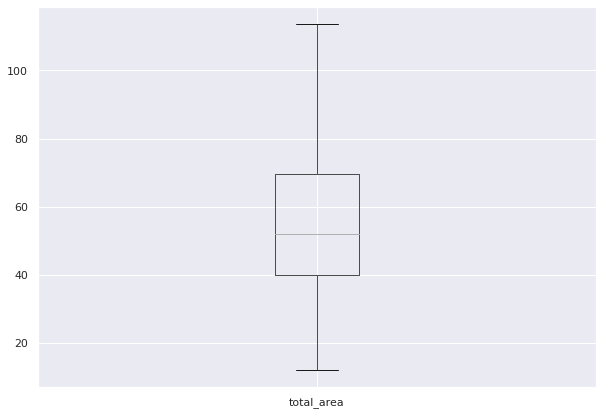

In [100]:
#смотрим границу "усов" для столбца total_area
data.boxplot(column='total_area', figsize=(10,7), showfliers=False);

In [101]:
#рассмотрим выбивающеся значения в столбце total_area
data.query('total_area<20')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
716,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.000000,1,False,True,False,3.300000,0.0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,поселок Шушары
4542,3300000.0,18.00,2018-11-07,1,3.50,5.0,9.000000,2,False,False,False,7.200000,0.0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,Санкт-Петербург
5855,945750.0,19.50,2017-09-18,0,2.76,3.0,12.700000,2,False,True,False,4.900000,0.0,поселок городского типа Дубровка,NaN,NaN,0.0,NaN,0.0,NaN,3.0,поселок городского типа Дубровка
6084,770000.0,18.00,2017-10-16,1,2.60,5.0,13.000000,4,False,False,False,3.000000,0.0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,90.0,Тихвин
8454,2250000.0,19.00,2019-03-12,0,3.00,6.0,13.422581,2,False,True,False,3.677419,0.0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,Санкт-Петербург
8729,2200000.0,18.40,2018-08-20,1,2.52,3.0,14.000000,3,False,False,False,2.400000,0.0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0,Пушкин
8755,1350000.0,18.80,2017-11-22,0,2.75,19.0,15.800000,1,False,True,False,1.100000,0.0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,Санкт-Петербург
8886,2450000.0,15.50,2018-08-22,0,2.60,5.0,10.000000,2,False,True,False,4.000000,0.0,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0,Санкт-Петербург
9157,3400000.0,17.60,2018-03-18,1,2.60,5.0,15.000000,2,False,False,False,0.800000,0.0,Санкт-Петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117.0,Санкт-Петербург
9412,2100000.0,16.00,2017-12-10,0,2.60,6.0,13.000000,1,False,True,True,1.400000,0.0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,Санкт-Петербург


<div style="border:solid green 2px; padding: 20 px">
    
*По таблице видно, что многие квартиры расположены в центре Санкт-Петербурге. Действительно, в центре города можно найти совсем крохотные объекты недвижимости, расположенные в "старом фонде". Значит сделаем вывод, что данные реальны. Но такие квартиры встречаются редко, поэтому при исследовании взаимосвязей просто исключим их из анализа.*

</div>

In [102]:
#рассмотрим выбивающеся значения в столбце total_area
data.query('total_area>150').sort_values(by='last_price')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
21338,3200000.0,190.0,2016-06-16,1,3.0,6.0,43.000000,4,False,False,False,13.000000,0.0,Санкт-Петербург,22592.0,4312.0,1.0,350.0,0.0,NaN,11.0,Санкт-Петербург
7756,4390000.0,151.8,2017-04-28,6,3.5,6.0,106.500000,6,False,False,False,14.300000,1.0,Санкт-Петербург,24576.0,2270.0,0.0,NaN,0.0,NaN,44.0,Санкт-Петербург
5837,4500000.0,185.0,2018-08-14,3,2.8,3.0,62.000000,2,False,False,False,22.000000,0.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Выборг
2759,7500000.0,152.0,2018-07-27,3,3.0,3.0,107.380645,1,True,False,False,29.419355,1.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,7.0,Всеволожск
2462,7900000.0,201.5,2018-08-17,7,2.8,2.0,142.350000,2,False,False,False,39.000000,0.0,поселок Парголово,54990.0,20665.0,0.0,NaN,0.0,NaN,35.0,поселок Парголово
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.000000,5,False,False,False,70.000000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,Санкт-Петербург
1436,330000000.0,190.0,2018-04-04,3,3.5,7.0,95.000000,5,False,False,False,40.000000,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,Санкт-Петербург
14706,401300000.0,401.0,2016-02-20,5,2.8,9.0,204.000000,9,False,False,False,24.000000,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,Санкт-Петербург
19540,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.700000,25,False,False,False,112.000000,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Санкт-Петербург


In [103]:
#найдем населенные пункты, где расположены квартиры с пощадью больше 150 кв.м.
data.query('total_area>150')['locality_name_new'].unique()

array(['Санкт-Петербург', 'Петергоф', 'Пушкин', 'поселок Александровская',
       'Красное Село', 'поселок Репино', 'поселок Парголово',
       'Сестрорецк', 'Всеволожск', 'Выборг', 'Сертолово', 'Зеленогорск',
       'Кронштадт', 'деревня Хязельки', 'деревня Новое Девяткино',
       'Павловск', 'поселок Стрельна', 'Колпино', 'деревня Бор'],
      dtype=object)

In [104]:
#найдем медианную стоимость таких квартир за исключением Санкт-Петербурга
data.query('total_area>150 and locality_name!="Санкт-Петербург"')['last_price'].median()

15782000.0

In [105]:
#найдем медианную стоимость квартир с площадью > 150 кв.м. в Санкт-Петербурге
data.query('total_area>150 and locality_name=="Санкт-Петербург"')['last_price'].median()

26558000.0

In [106]:
#найдем медианную стоимость квартир с площадью > 150 кв.м.
data.query('total_area>150')['last_price'].median()

26000000.0

In [107]:
# строки, где расположены квартиры с площадью больше 150 кв.м. за исключением Санкт-Петербурга
data.query('total_area>150 and locality_name!="Санкт-Петербург"')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
42,22000000.0,161.8,2015-07-08,4,2.80,4.0,80.900000,2,False,False,False,17.600000,4.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,Петергоф
521,25717300.0,230.1,2015-01-21,3,2.80,3.0,130.000000,1,False,False,False,26.100000,1.0,Пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0,Пушкин
670,13700000.0,178.0,2017-08-08,4,2.77,16.0,125.000000,4,False,False,False,16.000000,1.0,поселок Александровская,13012.0,27584.0,0.0,NaN,1.0,914.0,112.0,поселок Александровская
679,13700000.0,200.0,2017-09-27,4,2.90,4.0,90.000000,1,False,False,False,35.000000,0.0,Петергоф,38993.0,34182.0,1.0,233.0,1.0,234.0,172.0,Петергоф
1519,22000000.0,174.0,2014-12-10,4,2.80,4.0,80.900000,2,False,False,False,17.600000,0.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,1133.0,Петергоф
2003,21000000.0,215.0,2017-11-11,4,2.80,5.0,55.000000,2,False,False,False,17.000000,0.0,Красное Село,24842.0,28266.0,1.0,311.0,1.0,1009.0,14.0,Красное Село
2454,28000000.0,160.0,2016-10-24,3,3.00,2.0,92.000000,2,False,False,False,30.000000,3.0,поселок Репино,61484.0,42583.0,0.0,NaN,0.0,NaN,NaN,поселок Репино
2462,7900000.0,201.5,2018-08-17,7,2.80,2.0,142.350000,2,False,False,False,39.000000,0.0,поселок Парголово,54990.0,20665.0,0.0,NaN,0.0,NaN,35.0,поселок Парголово
2756,13040000.0,196.0,2018-08-07,5,2.80,4.0,138.464516,4,False,False,False,37.935484,0.0,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,107.0,Сестрорецк
2759,7500000.0,152.0,2018-07-27,3,3.00,3.0,107.380645,1,True,False,False,29.419355,1.0,Всеволожск,NaN,NaN,0.0,NaN,0.0,NaN,7.0,Всеволожск


<div style="border:solid green 2px; padding: 20 px">
    
*Недвижимость с большой общей площадью имеет медианную цену ~26 млн.руб., что почти в четыре раза  выше медианной по всем населенным пунктам.  Данная недвижимость относится к элитному классу, и вероятно, представленные значения реальны. Но такие квартиры встречаются редко, поэтому при исследовании взаимосвязей просто исключим их из анализа.*

</div>

In [108]:
#исключим из рассмотрения квартиры с общей площадью < 20кв.м. и общей площадью > 150кв.м
#исключим из рассмотрения квартиры с количеством комнат больше 7
#исключим из рассмотрения квартиры с ценой выше 100 млн.руб
data = data.query('total_area>20 and total_area<150 and rooms<8 and last_price<100000000')

In [109]:
#проверим количество обрасываемых данных
data.shape[0] / data_row.shape[0]

0.9527828178404152

<div class="alert alert-block alert-success">

**Вывод**
    
В данном разделе были обработаны пропуски в столбцах 
- `locality_name` (удалены строки, где имя населенного пукнта отсутствует);
- `is_apartment` пустые строки заменены на "False";
- `balcony` пустые строки заменены на "0";
- `ponds_around3000` и `parks_around3000` пустые строки заменены на "0";
- `kitchen_area` и`living_area`, где отсутсвует одно значение, то заменено по следующим формулам:
    
   `total_area`*0.9 - `kitchen_area`
    
   `total_area`*0.9 - `living_area`
    
, а где отсутствуют оба значения, то замена произведена из среднего отношения `living_area`/`kitchen_area`;

- `ceiling_height` пустые значения заменены на медианное по группам в зависимости от общей площади ( 1 - до 1 квартиля 40 кв.м.; 2 - от первого до второго квартиля 40 - 52 кв.м.; 3 - от второго квартиля до третьего 52 - 69.5 кв.м.; 4 - от третьего квартиля до максимального значения 69.5 - 900 кв.м.
- `ceiling_height` аномальные значения заменены на медианное.

Редкие и выбивающиеся значения обработаны в столбцах:
- `kitchen_area`;
- `living_area`;
- `ceiling_height`;
- `airports_nearest`;
- `last_price`;
- `balcony`;
- `rooms`;
- `total_area`;
- `floors_total`.

Изменены типы данных в столбцах на целочисленный тип:    
- `last_price`;
- `balcony`.
    
Изменены типы данных в столбцах на булевый:
- `is_apartment`.
Столбец `first_day_exposition` переведен в специальный тип для даты "datetime64".
    
Датафрейм очищен от явных дубликатов, а также удалены неявные в столбце `locality_name_new`.
    
В результате обработки пропусков, дубликатов и редких выбивающихся значений было отброшено около 5% данных, что не превышает требуемые 10%.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Категоризация данных

In [110]:
#функция для разделения этажей по категориями: первый, последний, другой
def category_floors (row):
    floor = row['floor']
    max_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(category_floors, axis=1)

#### Добавляем новые столбцы

In [111]:
#добавим столбец с ценой 1 кв.м
data['price_sq_m'] = data['last_price']/data['total_area']

In [112]:
#переведем столбец в целочисленный тип
data['price_sq_m'] = data['price_sq_m'].astype(int)

In [113]:
#добавляем столбец с днем публикации
data['publication_day'] = data['first_day_exposition'].dt.weekday

In [114]:
#добавляем столбец с месяцем
data['publication_month'] = data['first_day_exposition'].dt.month

In [115]:
#добавляем столбец с годом
data['publication_year'] = data['first_day_exposition'].dt.year

In [116]:
#расстояние до центра города в км
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)

In [117]:
data[['floor','floors_total','floor_category', 'first_day_exposition', 'publication_day', 'publication_day', 'publication_year', 'city_centers_nearest_km']]

,floor,floors_total,floor_category,first_day_exposition,publication_day,publication_day,publication_year,city_centers_nearest_km
0,8,16.0,другой,2019-03-07,3,3,2019,16.0
1,1,11.0,первый,2018-12-04,1,1,2018,19.0
2,4,5.0,другой,2015-08-20,3,3,2015,14.0
4,13,14.0,другой,2018-06-19,1,1,2018,8.0
5,5,12.0,другой,2018-09-10,0,0,2018,NaN
...,...,...,...,...,...,...,...,...
23694,3,5.0,другой,2017-03-21,1,1,2017,4.0
23695,4,5.0,другой,2018-01-15,0,0,2018,NaN
23696,1,3.0,первый,2018-02-11,6,6,2018,NaN
23697,12,17.0,другой,2017-03-28,1,1,2017,10.0


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22580 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   last_price               22580 non-null  float64       
 1   total_area               22580 non-null  float64       
 2   first_day_exposition     22580 non-null  datetime64[ns]
 3   rooms                    22580 non-null  int64         
 4   ceiling_height           22580 non-null  float64       
 5   floors_total             22497 non-null  float64       
 6   living_area              22580 non-null  float64       
 7   floor                    22580 non-null  int64         
 8   is_apartment             22580 non-null  bool          
 9   studio                   22580 non-null  bool          
 10  open_plan                22580 non-null  bool          
 11  kitchen_area             22580 non-null  float64       
 12  balcony                  22580 n

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

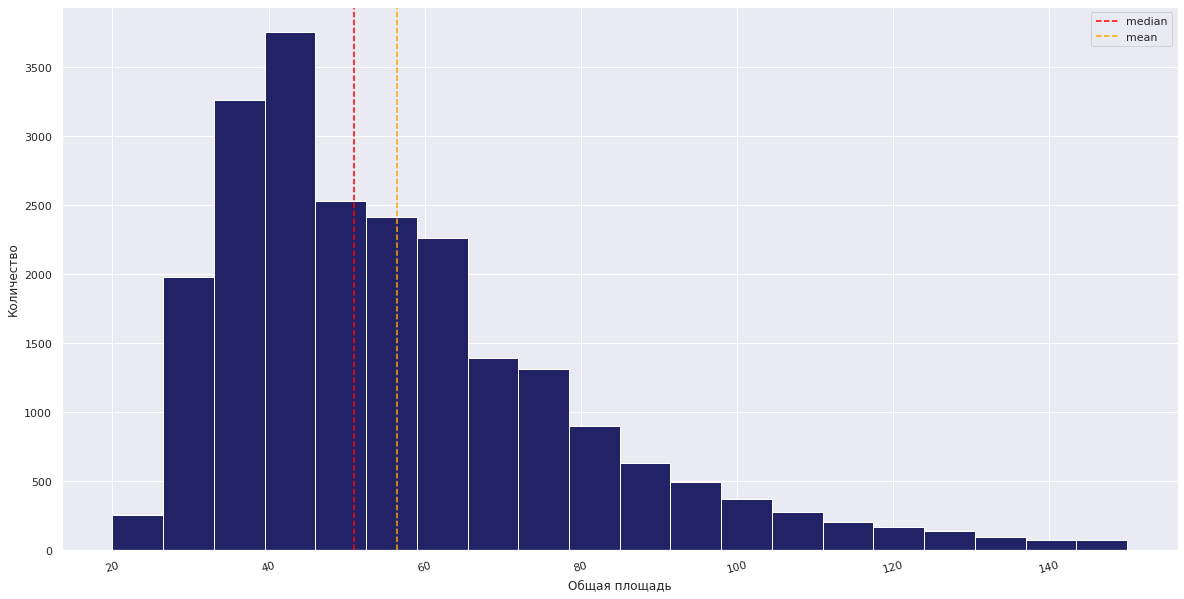

In [119]:
#гистограмма для столбца total_area
plt.hist(data['total_area'],bins=20,color='#222267',range=(20,150))
plt.axvline(data['total_area'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['total_area'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

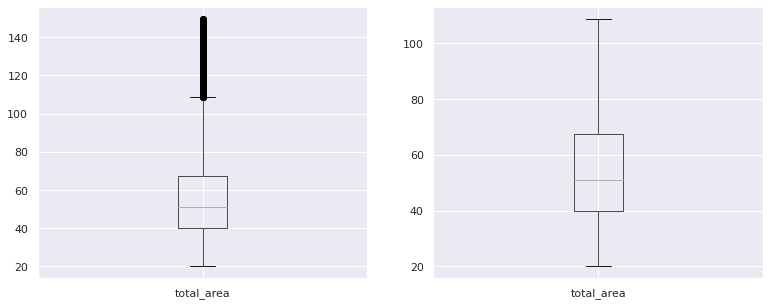

In [120]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='total_area', figsize=(13, 5), ax=ax[0])
data.boxplot(column='total_area', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
*Ожидаемое распределение общей площади — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевых значений площадей. На диаграмме выше мы получили именно такое распределение: диаграмма не имеет нулевых значений, наибольшее количество квартир приходится на площадь между 40-50 кв.м, что логично - это 2-комнатная квартира. Наибольшее количество значений лежит в диапазоне до 70 кв.м., что выглядит правдоподобно, первый квартиль лежит на уровне 40 кв.м. Имеются площади выходящие за границу "уса", это сегмент бизнес-жилья.*
    
</div>

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

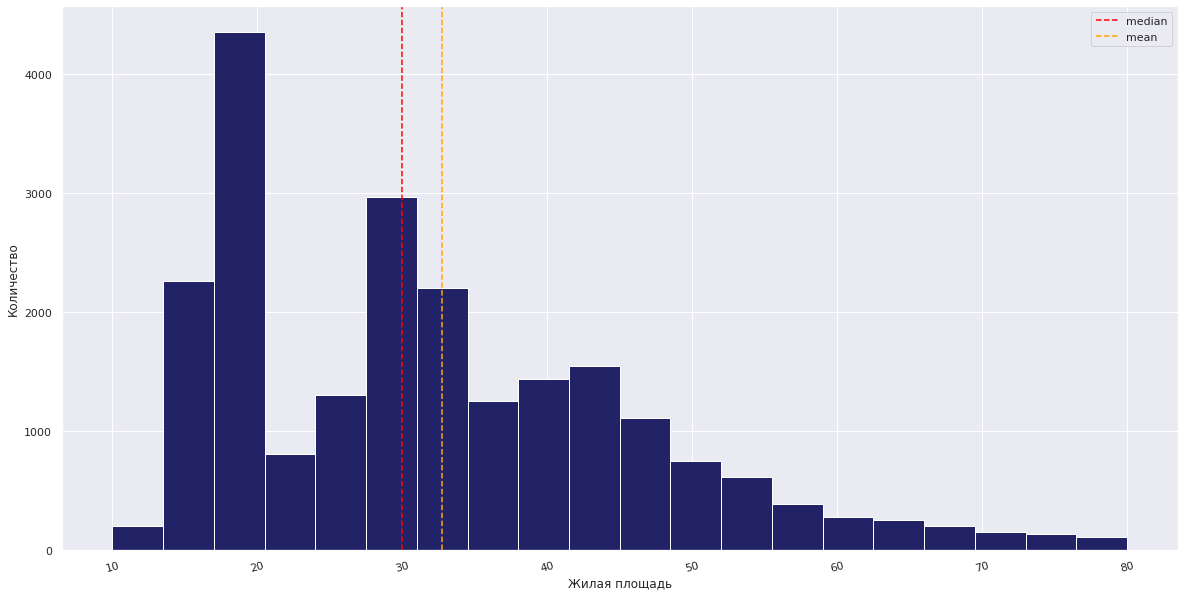

In [121]:
#гистограмма для столбца living_area
plt.hist(data['living_area'],bins=20,color='#222267',range=(10,80))
plt.axvline(data['living_area'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['living_area'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

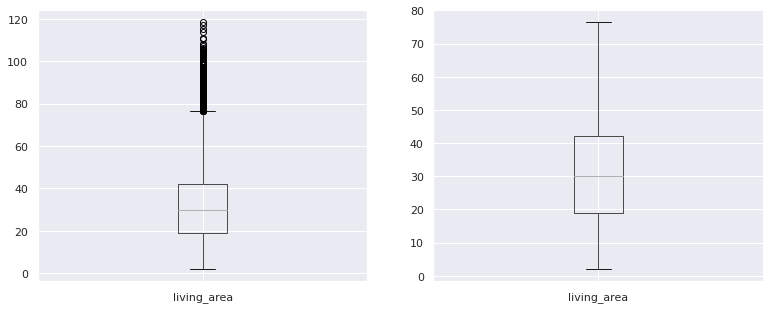

In [122]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='living_area', figsize=(13, 5), ax=ax[0])
data.boxplot(column='living_area', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

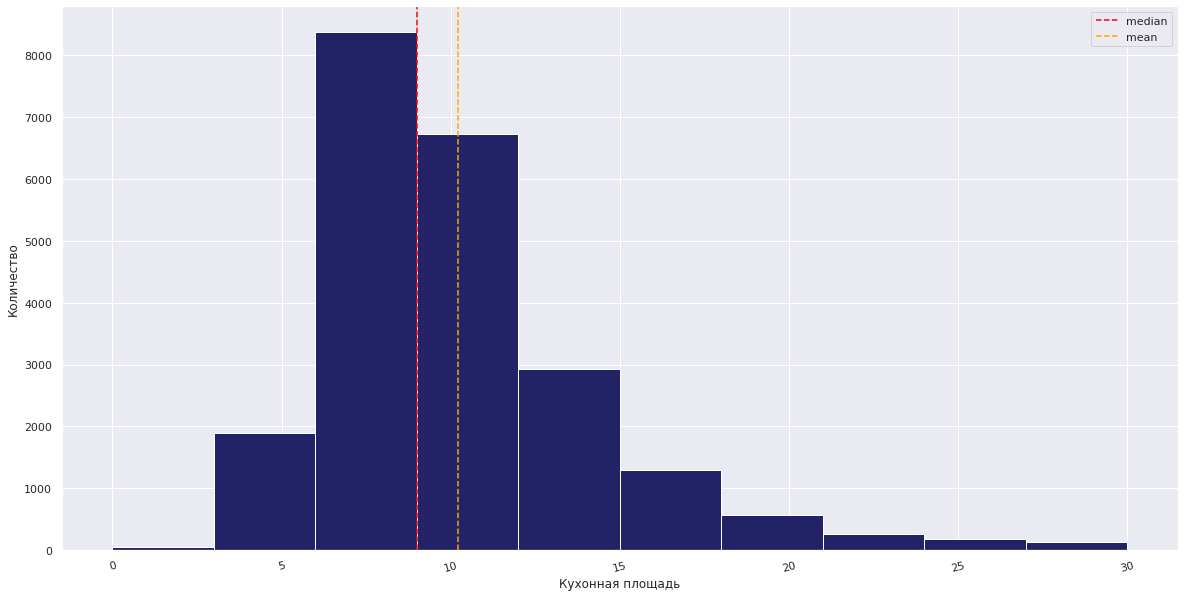

In [123]:
#гистограмма для столбца kitchen_area
plt.hist(data['kitchen_area'],bins=10,color='#222267',range=(0,30))
plt.axvline(data['kitchen_area'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['kitchen_area'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Кухонная площадь')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

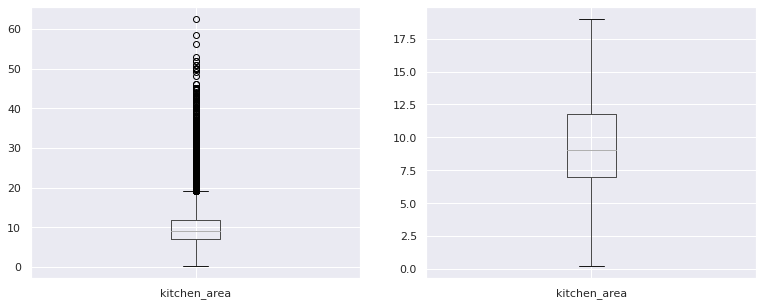

In [124]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='kitchen_area', figsize=(13, 5), ax=ax[0])
data.boxplot(column='kitchen_area', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
*Диаграмма жилой  и кухонной площади имеет похожий вид. Пиковое значение для жилой приходится на площадь около 20 кв.м., а для кухонной - 8 кв.м., что логично меньше пиковой общей площади. Наибольшее количество значений жилой площади лежит в диапазоне до 40 кв.м., для кухонной до 12 кв.м., что выглядит правдоподобно. Первый квартиль лежит на уровне 20 кв.м. для жилой площади, и на уровне 7.5 кв.м. для кухонной. Имеются площади, выходящие за границу "уса", это опять же сегмент бизнес-жилья с большой общей площадью (соответственно и жилой, и кухонной).*

</div>

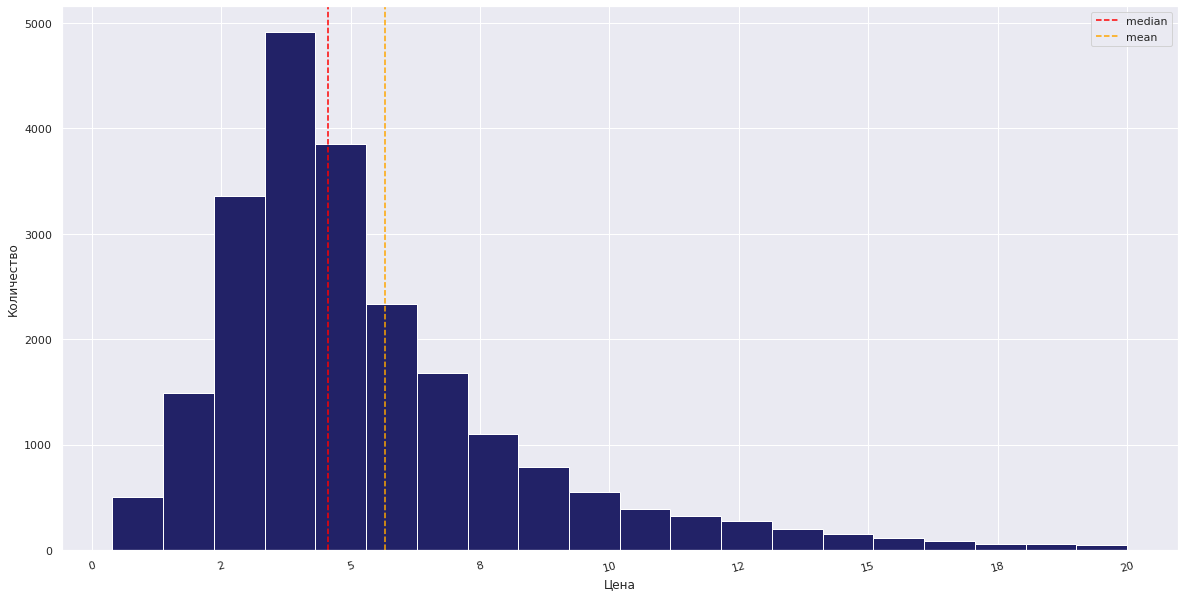

In [125]:
#гистограмма для столбца last_price
plt.hist(data['last_price']/1000000,bins=20,color='#222267',range=(0.4,20))
plt.axvline((data['last_price']/1000000).median(), color='red', linestyle='--', label='median')
plt.axvline((data['last_price']/1000000).mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

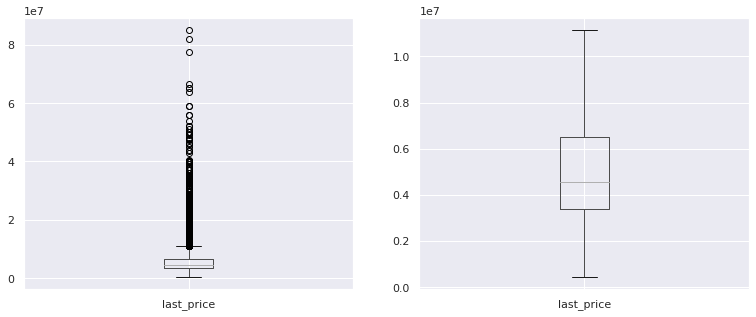

In [126]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='last_price', figsize=(13, 5), ax=ax[0])
data.boxplot(column='last_price', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

In [127]:
data['last_price'].describe()

count    2.258000e+04
mean     5.657087e+06
std      4.310849e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.570000e+06
75%      6.500000e+06
max      8.500000e+07
Name: last_price, dtype: float64

<div style="border:solid green 2px; padding: 20 px">
    
*По диаграмме видно, что наибольшее количество квартир стоят в диапазоне до 6.5 милиионов рублей, что в целом по России выглядит правдопободно. Медиана расположена на уровне 4.6 млн.руб. Максимальная стоимость доходит до 85 млн.руб., что для элитной недвижимости - реально.* 
</div>

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

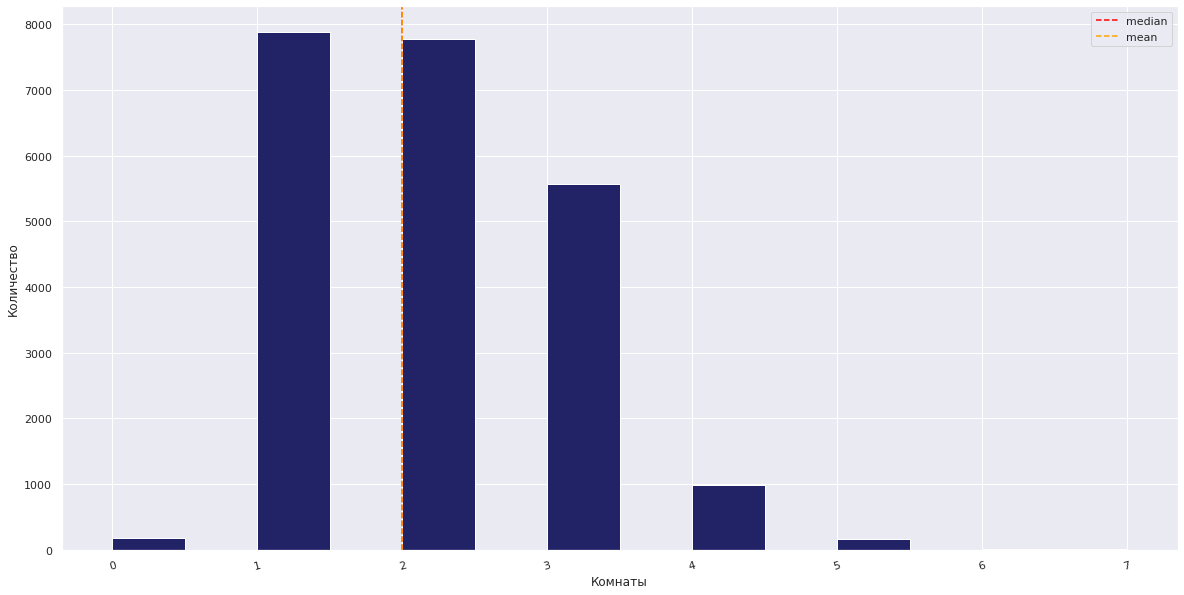

In [128]:
#гистограмма для столбца rooms
plt.hist(data['rooms'],bins=14,color='#222267',range=(0,7))
plt.axvline(data['rooms'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['rooms'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

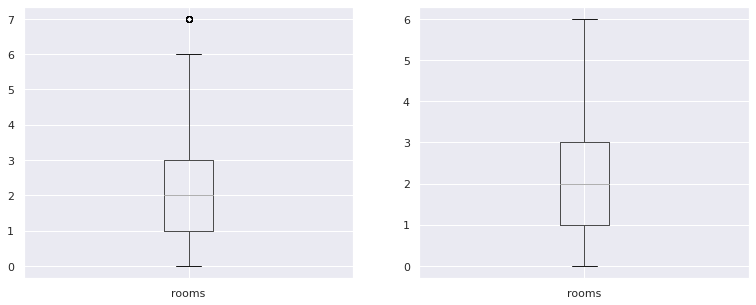

In [129]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='rooms', figsize=(13, 5), ax=ax[0])
data.boxplot(column='rooms', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

In [130]:
data['rooms'].describe()

count    22580.000000
mean         1.996191
std          0.944064
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<div style="border:solid green 2px; padding: 20 px">
    
*Наибольшее количество квартир имеют до 3-х комнат, 1-е и 2-е квартиры встречаются чаще, чем остальные. Имеются квартиры с 0 количеством комнат, как мы выяснили ранее - это студии.* 
</div>

(array([1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

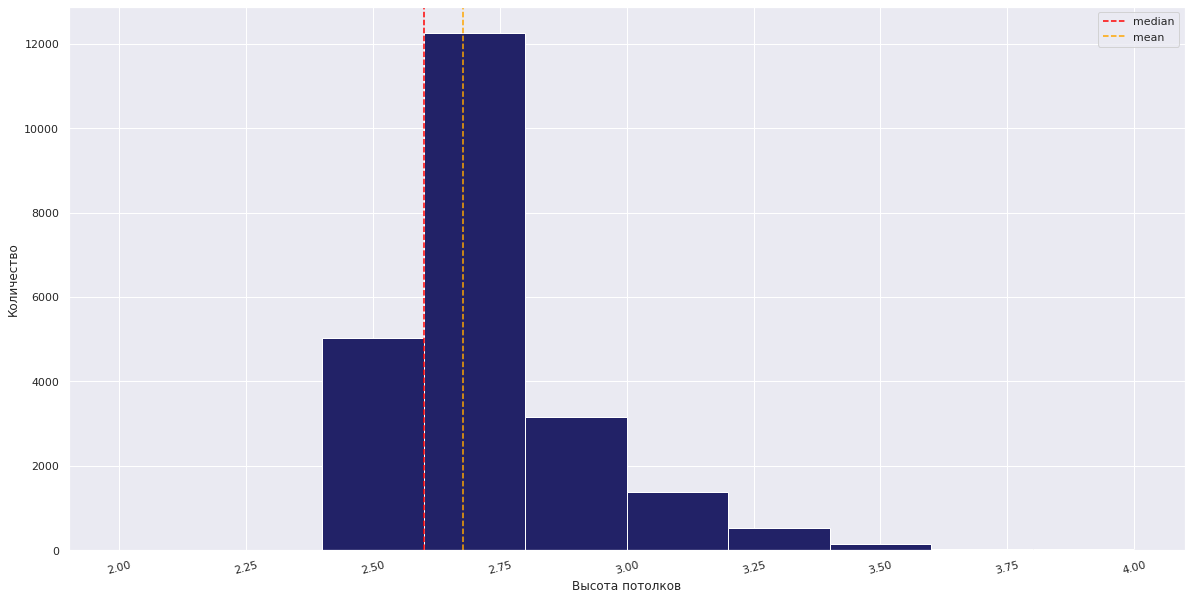

In [131]:
#гистограмма для столбца ceiling_height
plt.hist(data['ceiling_height'],bins=10,color='#222267',range=(2,4))
plt.axvline(data['ceiling_height'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['ceiling_height'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

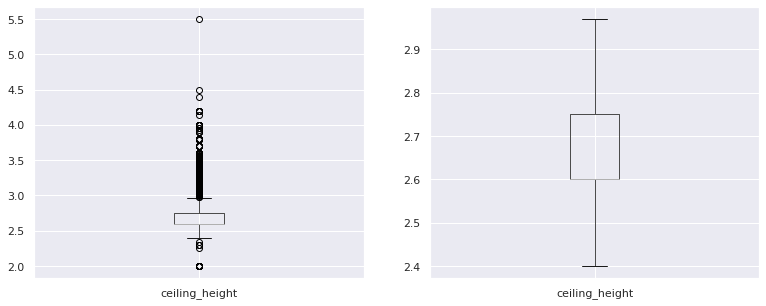

In [132]:
#диаграмма размаха
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
data.boxplot(column='ceiling_height', figsize=(13, 5), ax=ax[0])
data.boxplot(column='ceiling_height', figsize=(10,7), showfliers=False, ax=ax[1])
plt.show()

In [133]:
data[data['ceiling_height'] >4]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,floor_category,price_sq_m,publication_day,publication_month,publication_year,city_centers_nearest_km
2843,11990000.0,104.0,2018-03-13,3,4.20,3.0,66.000000,2,False,False,False,15.000000,0.0,Санкт-Петербург,22393.0,3884.0,0.0,NaN,0.0,NaN,350.0,Санкт-Петербург,другой,115288,1,3,2018,4.0
6901,15500000.0,107.0,2017-11-21,3,4.20,6.0,60.000000,3,False,False,False,25.000000,0.0,Санкт-Петербург,22148.0,4291.0,1.0,679.0,0.0,NaN,289.0,Санкт-Петербург,другой,144859,1,11,2017,4.0
7279,18000000.0,127.0,2016-05-17,3,4.20,3.0,83.800000,1,False,False,False,11.400000,0.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,970.0,Санкт-Петербург,первый,141732,1,5,2016,5.0
7578,38000000.0,143.0,2017-11-02,3,5.50,5.0,83.000000,5,False,False,False,29.000000,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,Санкт-Петербург,последний,265734,3,11,2017,6.0
11651,8500000.0,135.0,2016-07-03,3,4.40,5.0,61.500000,3,False,False,False,16.000000,0.0,Санкт-Петербург,24844.0,4840.0,0.0,NaN,1.0,787.0,257.0,Санкт-Петербург,другой,62962,6,7,2016,5.0
14519,17600000.0,112.0,2017-01-19,4,4.50,4.0,83.000000,2,False,False,False,10.000000,0.0,Санкт-Петербург,22794.0,1645.0,2.0,276.0,3.0,485.0,NaN,Санкт-Петербург,другой,157142,3,1,2017,2.0
14619,16000000.0,100.0,2018-03-20,3,4.20,4.0,62.400000,4,False,False,False,9.400000,0.0,Санкт-Петербург,24147.0,3714.0,0.0,NaN,3.0,541.0,NaN,Санкт-Петербург,последний,160000,1,3,2018,4.0
15567,15000000.0,117.3,2017-11-10,3,4.14,4.0,82.866774,4,False,False,False,22.703226,0.0,Санкт-Петербург,25126.0,3674.0,1.0,571.0,3.0,787.0,126.0,Санкт-Петербург,последний,127877,4,11,2017,4.0
19041,23750000.0,124.0,2016-11-25,3,4.20,6.0,67.000000,2,False,False,False,26.000000,0.0,Санкт-Петербург,23568.0,1898.0,3.0,515.0,3.0,264.0,775.0,Санкт-Петербург,другой,191532,4,11,2016,2.0
20873,11500000.0,113.5,2018-09-17,3,4.20,7.0,44.200000,6,False,False,False,21.700000,1.0,Санкт-Петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN,Санкт-Петербург,другой,101321,0,9,2018,0.0


<div style="border:solid green 2px; padding: 20 px">
    
*Наибольшее количество квартир имеют высоту потолков от 2.6 до 2.8 м. Имеются квартиры с высотой потолков выше 4 м, в основном это квартиры с большим значением общей площади, расположенные в Санкт-Петербурге. Действительно, в Санкт-Петербурге встречаются квартиры с высотой потолков от 4 м.* 
</div>

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

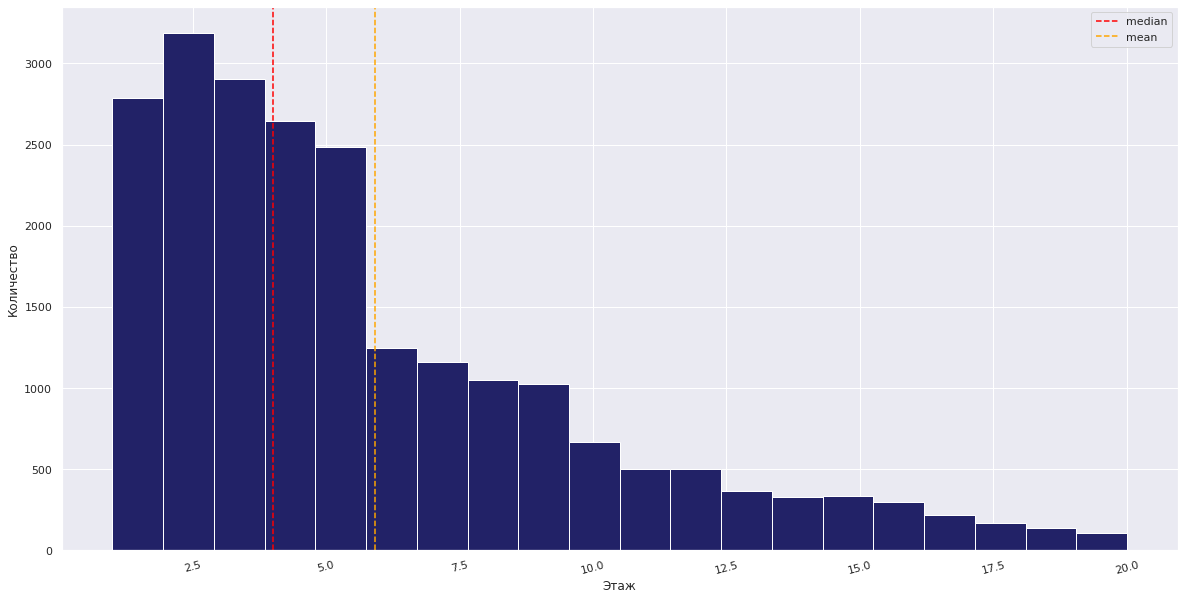

In [134]:
#гистограмма для столбца floor
plt.hist(data['floor'],bins=20,color='#222267',range=(1,20))
plt.axvline(data['floor'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['floor'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Этаж')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

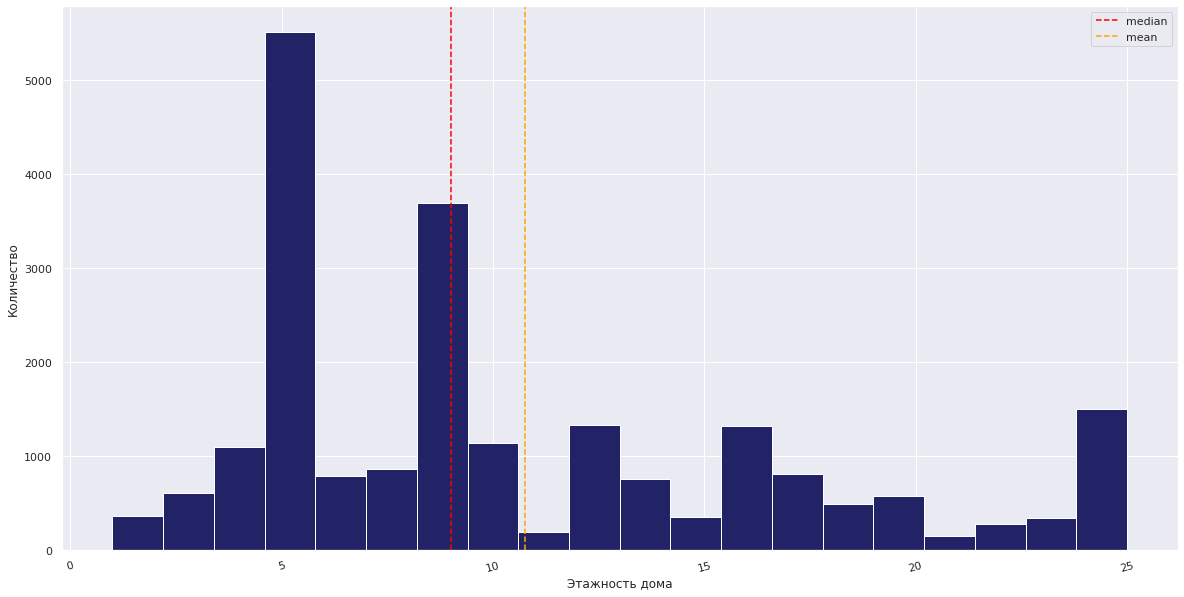

In [135]:
#гистограмма для столбца floors_total
plt.hist(data['floors_total'],bins=20,color='#222267',range=(1,25))
plt.axvline(data['floors_total'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['floors_total'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Этажность дома')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

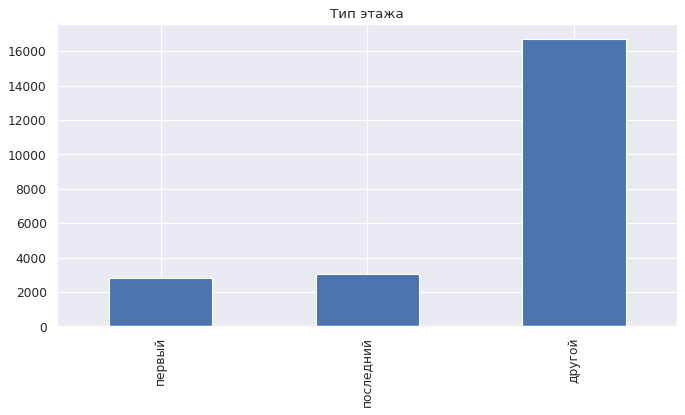

In [136]:
#столбчатая диаграмма для столбца floor_category
plt.figure(figsize=(10,5), dpi=80)
data['floor_category'].value_counts().sort_values().plot.bar()
plt.title('Тип этажа')
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
*Наоболее часто в объявлениях представлены квартиры до 5 этажа. На гистограмме с общей этажностью дома пик наблюдается на 5 этажах, значит наиболее часто встречающийся тип - пятиэтажки. По категориям этажей можно сделать вывод, что наибольшее количество квартир относится к категории "другой", что логично, ведь количество этажей в диапазоне между первым и последним больше.* 
</div>

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

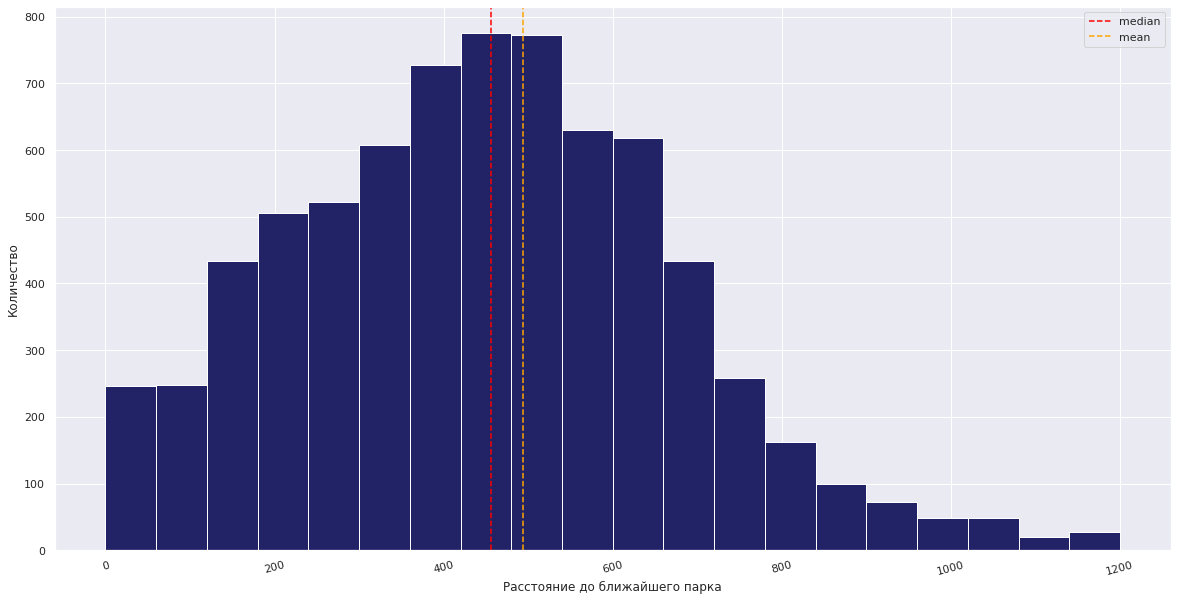

In [137]:
#гистограмма для столбца parks_nearest
plt.hist(data['parks_nearest'],bins=20,color='#222267',range=(0,1200))
plt.axvline(data['parks_nearest'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['parks_nearest'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

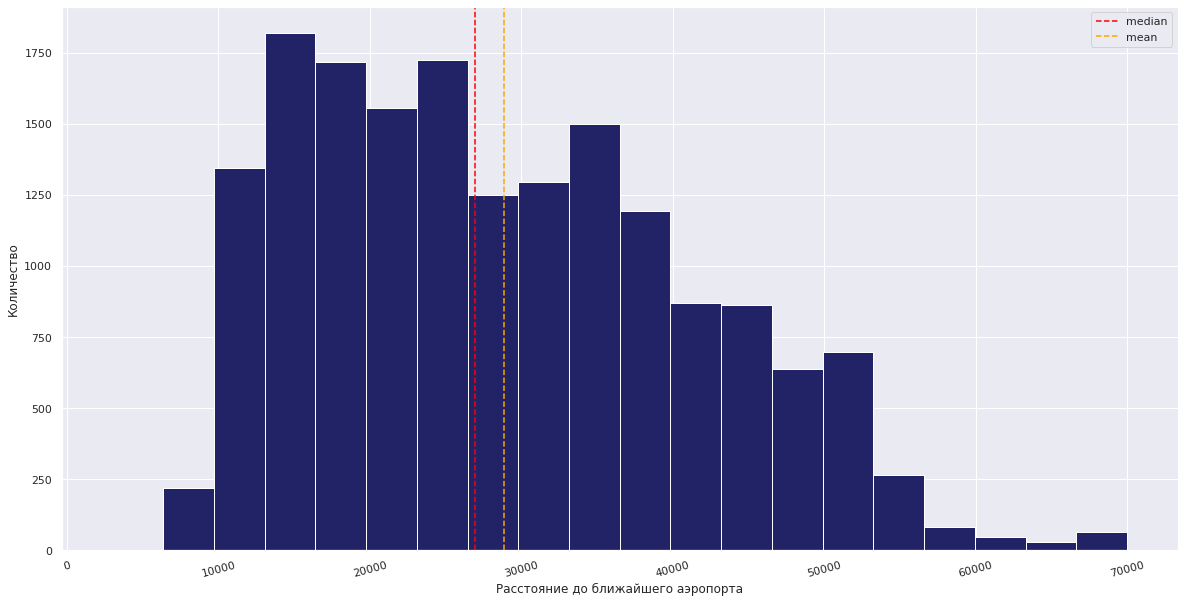

In [138]:
#гистограмма для столбца airports_nearest
plt.hist(data['airports_nearest'],bins=20,color='#222267',range=(3000,70000))
plt.axvline(data['airports_nearest'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['airports_nearest'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

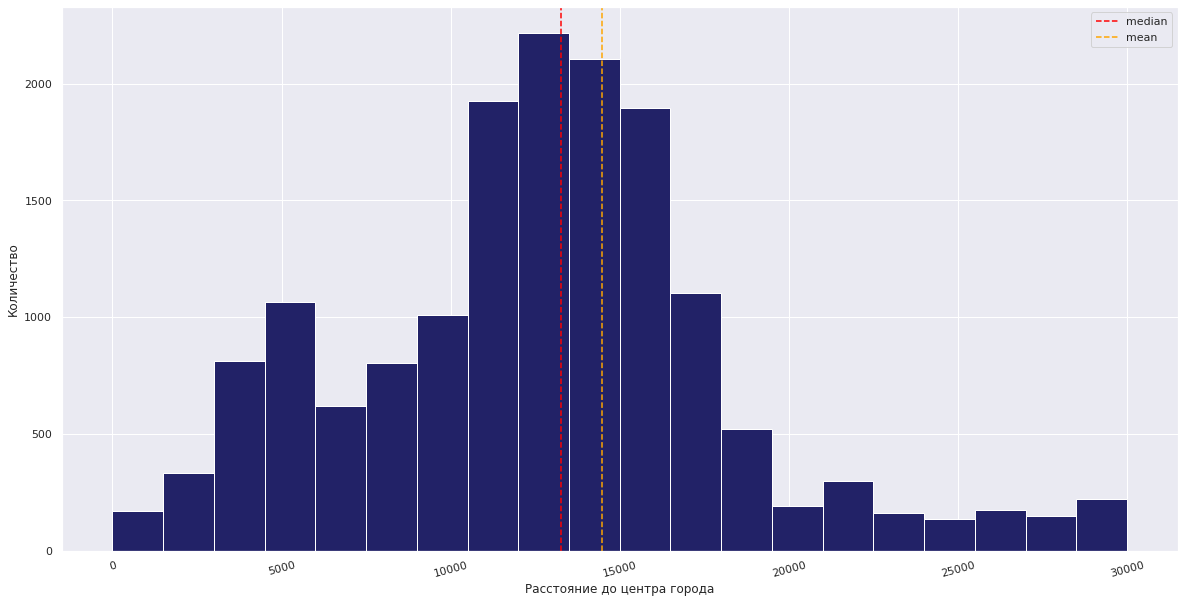

In [139]:
#гистограмма для столбца city_centers_nearest
plt.hist(data['city_centers_nearest'],bins=20,color='#222267',range=(0,30000))
plt.axvline(data['city_centers_nearest'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['city_centers_nearest'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

<div style="border:solid green 2px; padding: 20 px">
    
*Чаще всего встречаются квартиры с расстоянием до ближайшего аэропорта от 15 до 30 км. Наибольшее количество квартир имеют ближайший парк на расстоянии около 450-550 м. Наибольшее количество объявлений представлено с расстоянием от 10 до 16 км до центра города.* 
    
</div>

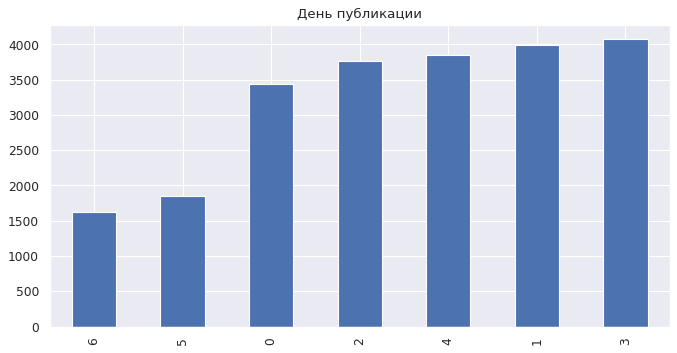

In [140]:
#столбчатая диаграмма для столбца publucation_day
plt.figure(figsize=(10,5), dpi=80)
data['publication_day'].value_counts().sort_values().plot.bar()
plt.title('День публикации')
plt.show()

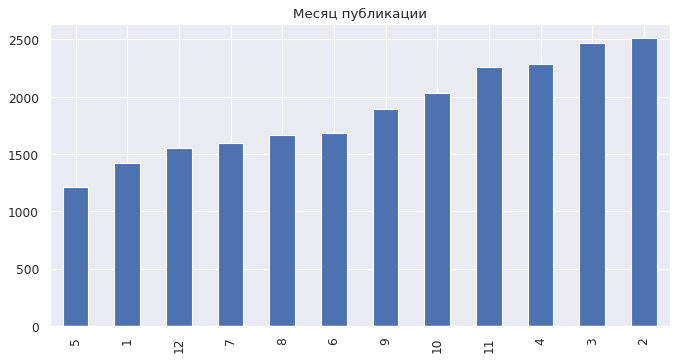

In [141]:
#столбчатая диаграмма для столбца publucation_month
plt.figure(figsize=(10,5), dpi=80)
data['publication_month'].value_counts().sort_values().plot.bar()
plt.title('Месяц публикации')
plt.show()

<div style="border:solid green 2px; padding: 20 px">
    
*По столбчатым диаграммам видно, что максимальное количество публикаций квартир приходится на будние дни (понедельник - пятница). Наиболее популярные месяцы загрузки объявлений - февраль и март.* 
    
</div>

#### Изучение времени продажи квартир

In [142]:
data['days_exposition'].describe()

count    19618.000000
mean       178.433938
std        217.405753
min          1.000000
25%         44.000000
50%         94.000000
75%        227.750000
max       1580.000000
Name: days_exposition, dtype: float64

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600., 1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

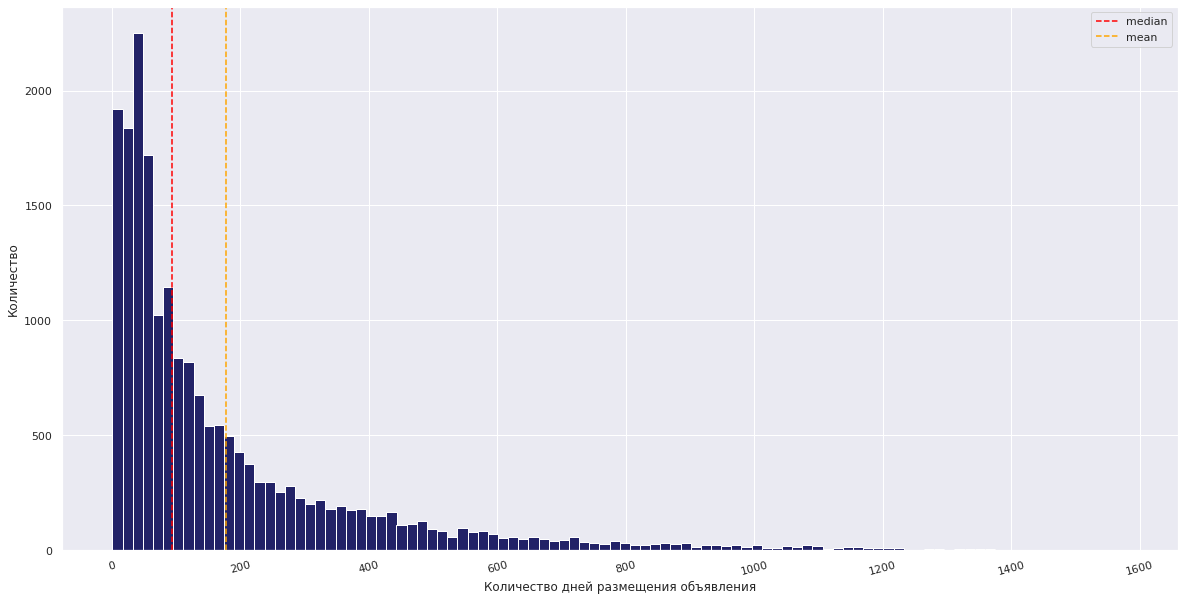

In [143]:
#построим гистограмму для столбца  days_exposition
plt.hist(data['days_exposition'],bins=100,color='#222267',range=(1,1580))
plt.axvline(data['days_exposition'].median(), color='red', linestyle='--', label='median')
plt.axvline(data['days_exposition'].mean(), color='orange', linestyle='--', label='mean')
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation=15)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

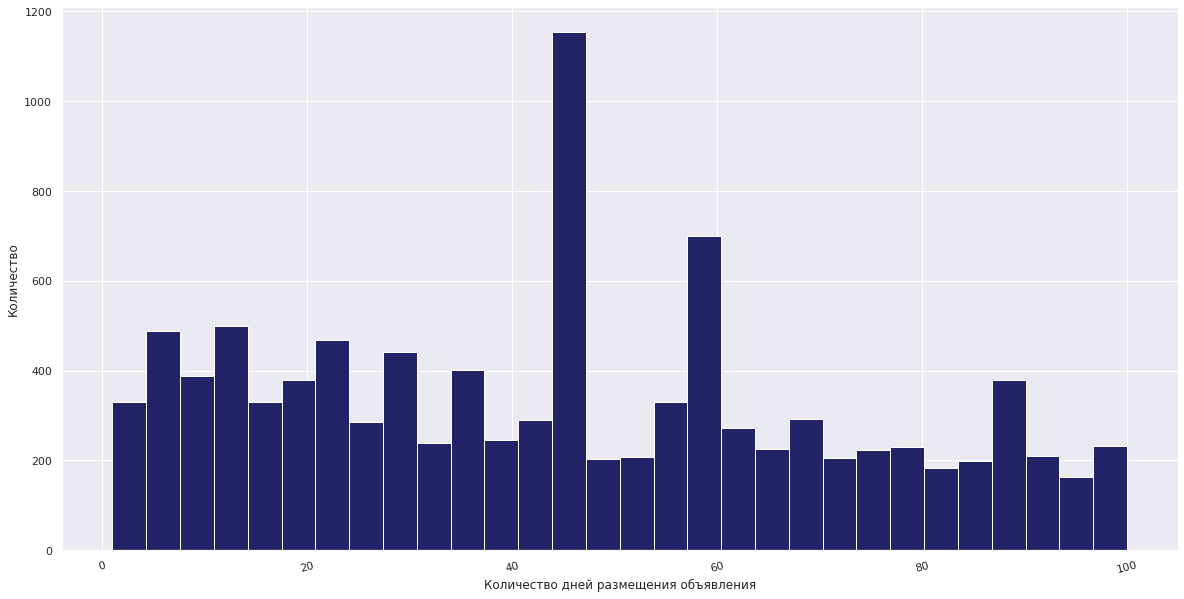

In [144]:
#построим гистограмму для столбца  days_exposition от 0 до 100 дней
plt.hist(data['days_exposition'],bins=30,color='#222267',range=(1,100))
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество')
plt.xticks(rotation=15)

In [145]:
#среднее и медиана для количества дней размещения
print(data['days_exposition'].mean())
data['days_exposition'].median()


178.43393822000203


94.0

<div style="border:solid green 2px; padding: 20 px">
    
*Половина квартир продается в течение 95 дней, большая часть квартир продается до 230 дней. Среднее и медиана сильно отличаются (медиана - 95, среднее - 181), значит имеются большие выбросы, которые и смещают среднее вправо.
Срок размещения объявления больше 300 дней уже встречается достаточно редко, а больше 800 график сливается с нулем.
Значит долгой продажей будем считать продажу, которая длится больше 300 дней, быстрой - до 150 дней.* 
    
</div>

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [146]:
#10 населенных пунктов с наибольшим количеством объвлений
data_num_of_ads = data.groupby('locality_name_new')['locality_name_new'].count().sort_values(ascending=False)
data_num_of_ads = data_num_of_ads.iloc[:10]
data_num_of_ads

locality_name_new
Санкт-Петербург      14850
поселок Мурино         575
деревня Кудрово        465
поселок Шушары         435
Всеволожск             384
Пушкин                 354
Колпино                333
поселок Парголово      323
Гатчина                300
Выборг                 227
Name: locality_name_new, dtype: int64

In [147]:
#создаем список с 10 нп с наибольшим количеством объявлений
list_place = list(data_num_of_ads.index)
list_place

['Санкт-Петербург',
 'поселок Мурино',
 'деревня Кудрово',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'Выборг']

In [148]:
#находим среднюю цену 1 кв.м. в 10 нп в наибольшим количеством объявлений
data[data['locality_name_new'].isin(list_place)].groupby('locality_name_new')['price_sq_m'].mean().sort_values(ascending=False)

locality_name_new
Санкт-Петербург      111815.194411
Пушкин               102633.480226
деревня Кудрово       95211.660215
поселок Парголово     90206.736842
поселок Мурино        85878.646957
поселок Шушары        78630.009195
Колпино               75380.378378
Гатчина               68693.570000
Всеволожск            68512.080729
Выборг                58403.638767
Name: price_sq_m, dtype: float64

<AxesSubplot:xlabel='locality_name_new'>

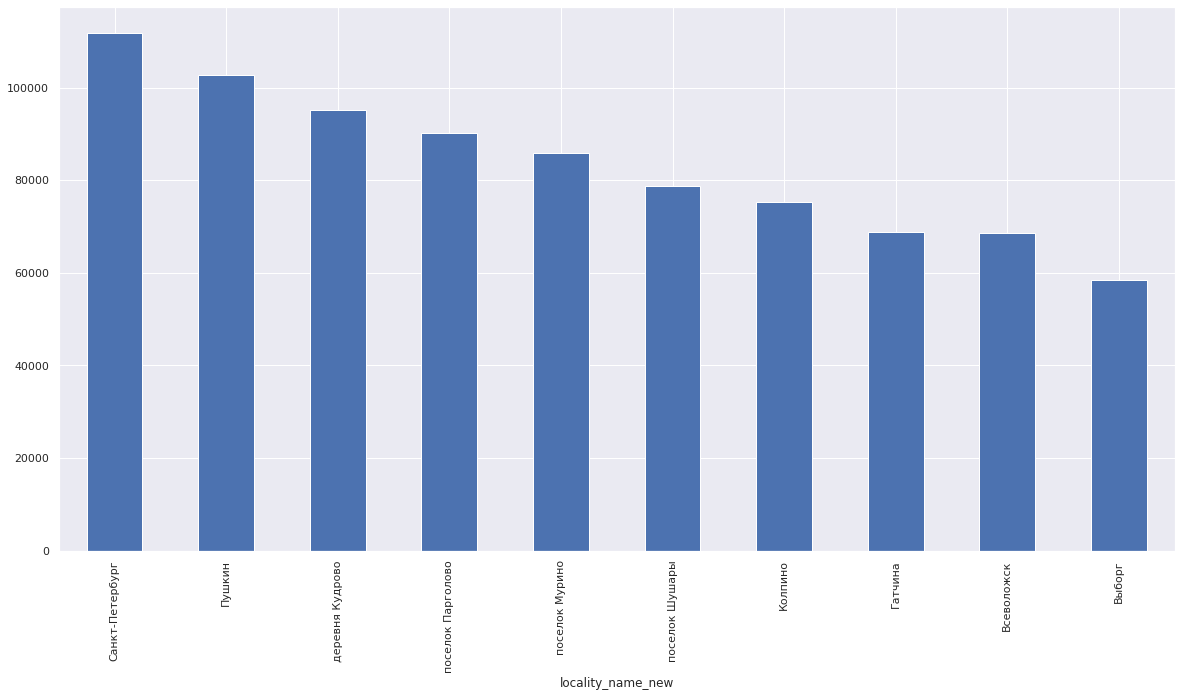

In [149]:
data[data['locality_name_new'].isin(list_place)].groupby('locality_name_new')['price_sq_m'].mean().sort_values(ascending=False).plot.bar()

<div style="border:solid green 2px; padding: 20 px">
    
*Наибольшая цена 1 кв.м. наблюдается в Санкт-Петербурге - 111815 руб. В топ-10 по стоимости 1кв.м. жилья входят следующие города: Санкт-Петербург, поселок Мурино, деревня Кудрово, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, Выборг. Причем в Выборге цена 1 кв.м. почти в два раза меньше, чем в Санкт-Петербурге.* 
    
</div>

#### Cредняя цена каждого километра в Санкт-Петербурге

In [150]:
#группируем данные по расстоянию до центра, и находим среднюю стоимость квартир для каждой группы
km_price = data[data['locality_name_new']=='Санкт-Петербург'].groupby('city_centers_nearest_km')['last_price'].mean()

In [151]:
data[data['locality_name_new']=='Санкт-Петербург'].groupby('city_centers_nearest_km')['last_price'].count()

city_centers_nearest_km
0.0       18
1.0      152
2.0      245
3.0      303
4.0      599
5.0      778
6.0      534
7.0      372
8.0      556
9.0      570
10.0     692
11.0    1151
12.0    1572
13.0    1419
14.0    1250
15.0    1523
16.0    1230
17.0     869
18.0     254
19.0     157
20.0      47
21.0     114
22.0     196
23.0      81
24.0      26
25.0      25
26.0      53
27.0       2
28.0       7
29.0       6
Name: last_price, dtype: int64

<AxesSubplot:xlabel='city_centers_nearest_km'>

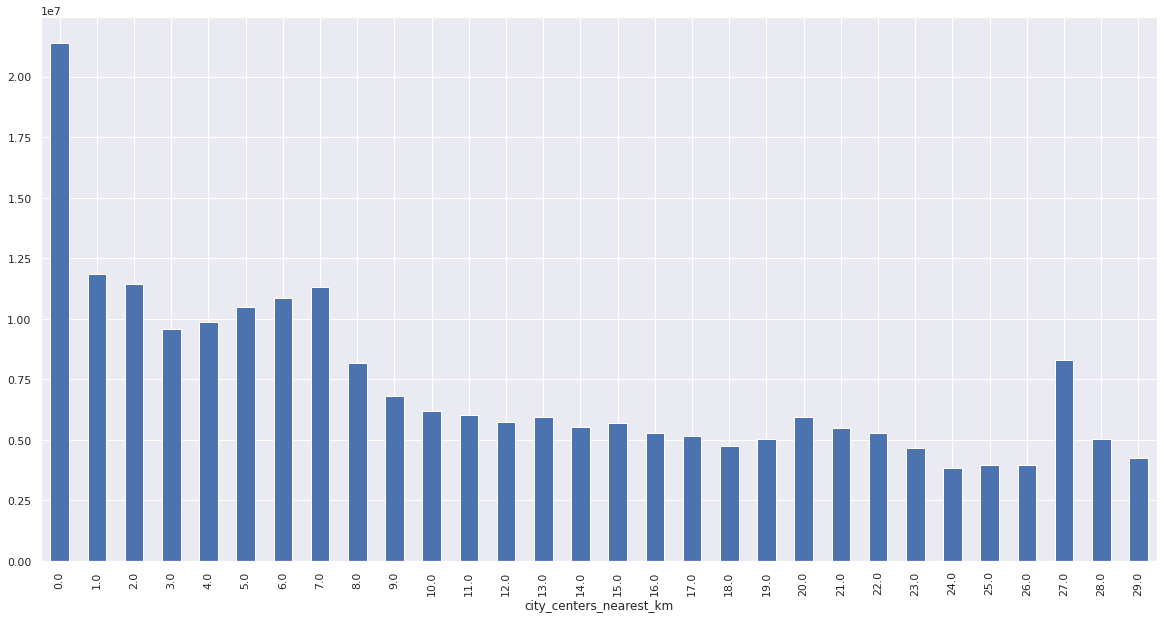

In [152]:
#строим гистрограмму
km_price.plot.bar()

<div style="border:solid green 2px; padding: 20 px">
    
*В целом по диаграмме можно сделать вывод, что с увеличением расстояния от центра средняя стоимость недвижимости уменьшается, но есть проблемые зоны. На 3 киллометре цена резко падает, а затем снова начинает расти до 7 км. Можно сделать предположение, что на 3 км находится "старый фонд" жилья (бывшие коммуналки, например), поэтому цена и получилась ниже по сравнению с квартирами расположенными от 4 до 7 км. Также на 27 км от центра цена резко возрастает почти в два раза. Возможно там находится жилой комплекс бизнес-класса, поэтому и образуется данный пик на гистограмме.* 
    
</div>

#### Факторы, влияющие на общую стоимость объекта

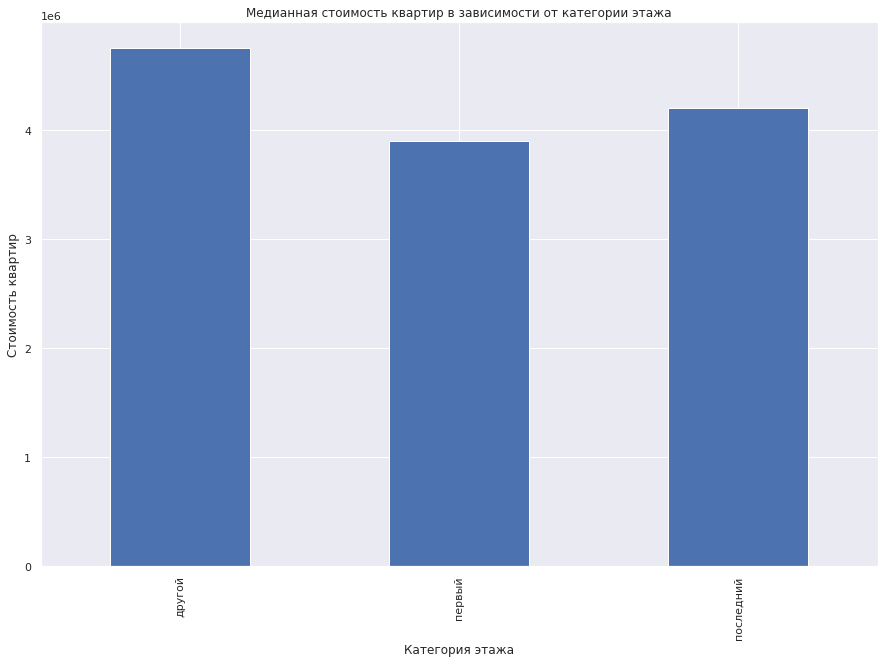

In [153]:
#проверяем взаимосвязнь цены с категорией этажа
data.groupby('floor_category')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость квартир')
plt.show()

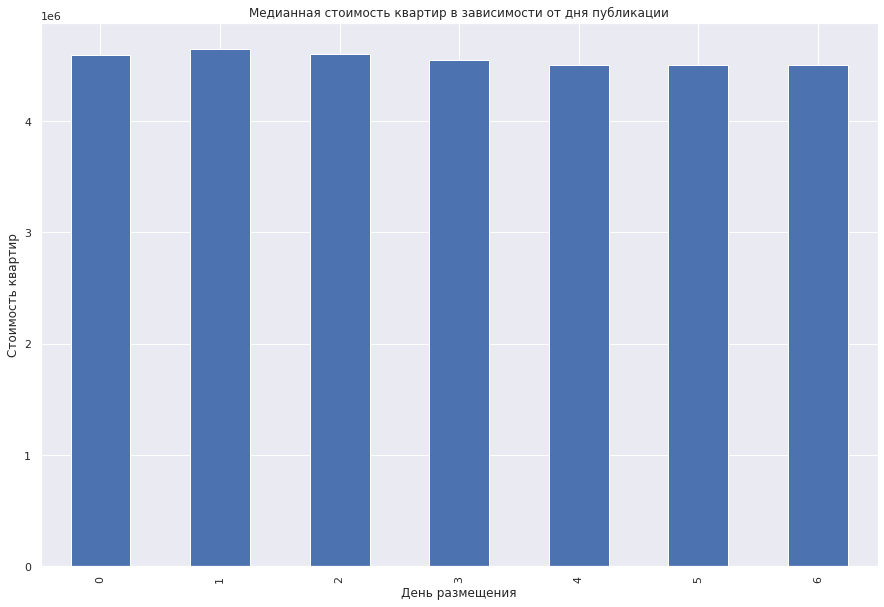

In [154]:
#проверяем взаимосвязнь цены с днем размещения
data.groupby('publication_day')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от дня публикации')
plt.xlabel('День размещения')
plt.ylabel('Стоимость квартир')
plt.show()

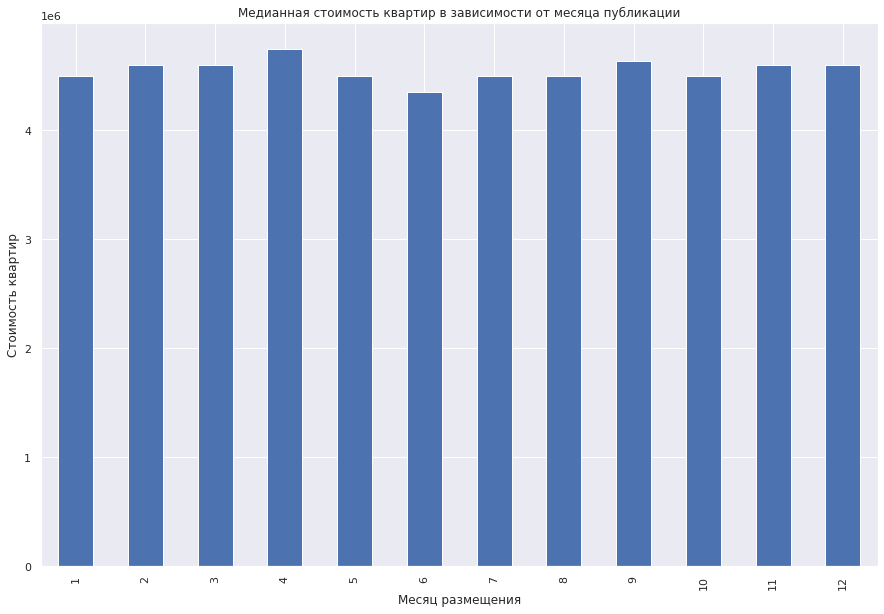

In [155]:
#проверяем взаимосвязь цены с месяцем размещения
data.groupby('publication_month')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от месяца публикации')
plt.xlabel('Месяц размещения')
plt.ylabel('Стоимость квартир')
plt.show()

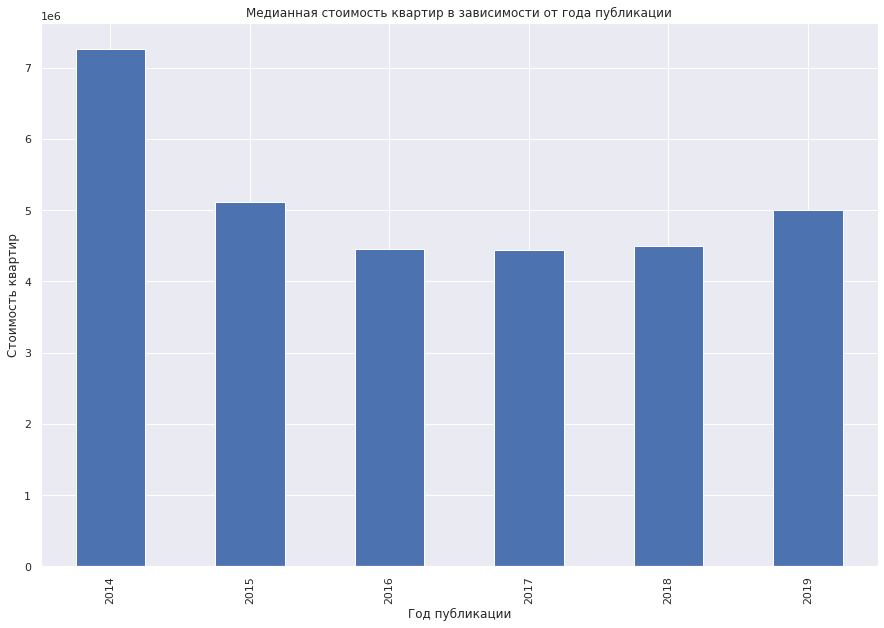

In [156]:
#проверяем взаимосвязнь цены с годом размещения
data.groupby('publication_year')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от года публикации')
plt.ylabel('Стоимость квартир')
plt.xlabel('Год публикации')
plt.show()

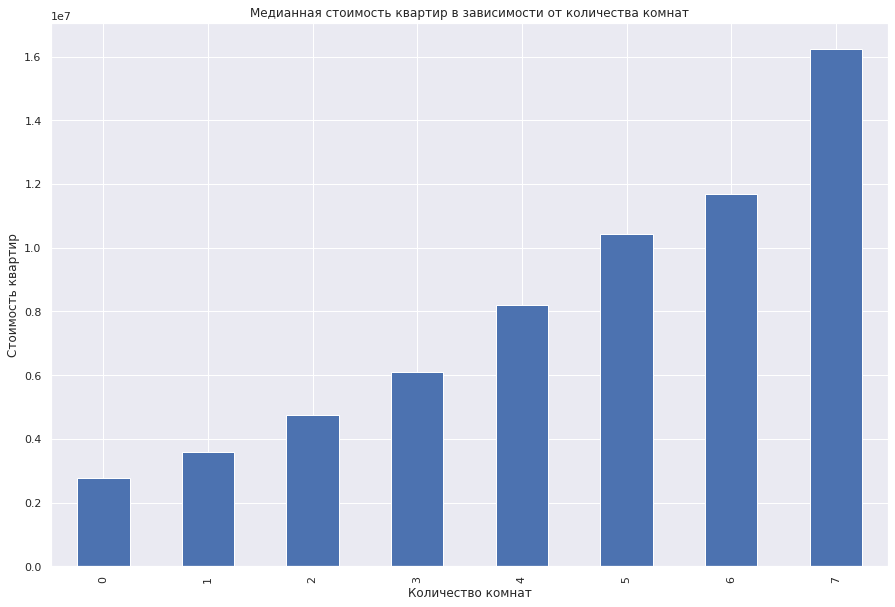

In [157]:
#проверяем взаимосвязнь цены с количеством комнат
data.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартир')
plt.show()

In [158]:
#подготовим датафрейм для расчета коэффициента корреляции
data_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
data_by_rooms['rooms'] = data_by_rooms.index
data_by_rooms

,last_price,rooms
rooms,,
0,2775000.0,0
1,3600000.0,1
2,4750000.0,2
3,6100000.0,3
4,8200000.0,4
5,10425000.0,5
6,11700000.0,6
7,16250000.0,7


In [159]:
data_by_rooms.corr()

,last_price,rooms
last_price,1.000000,0.974675
rooms,0.974675,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


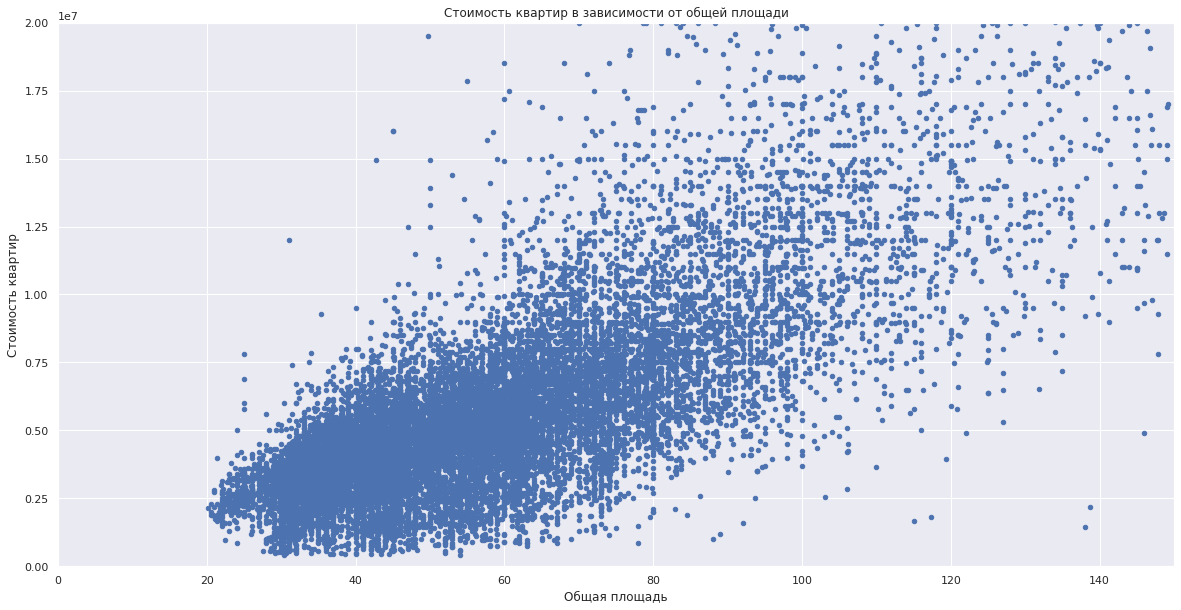

In [160]:
#проверяем взаимосвязнь цены с общей площадью
data.plot(x='total_area', y='last_price', kind='scatter', xlim=(0, 150), ylim=(0, 20000000), grid=True)
plt.title('Cтоимость квартир в зависимости от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость квартир')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


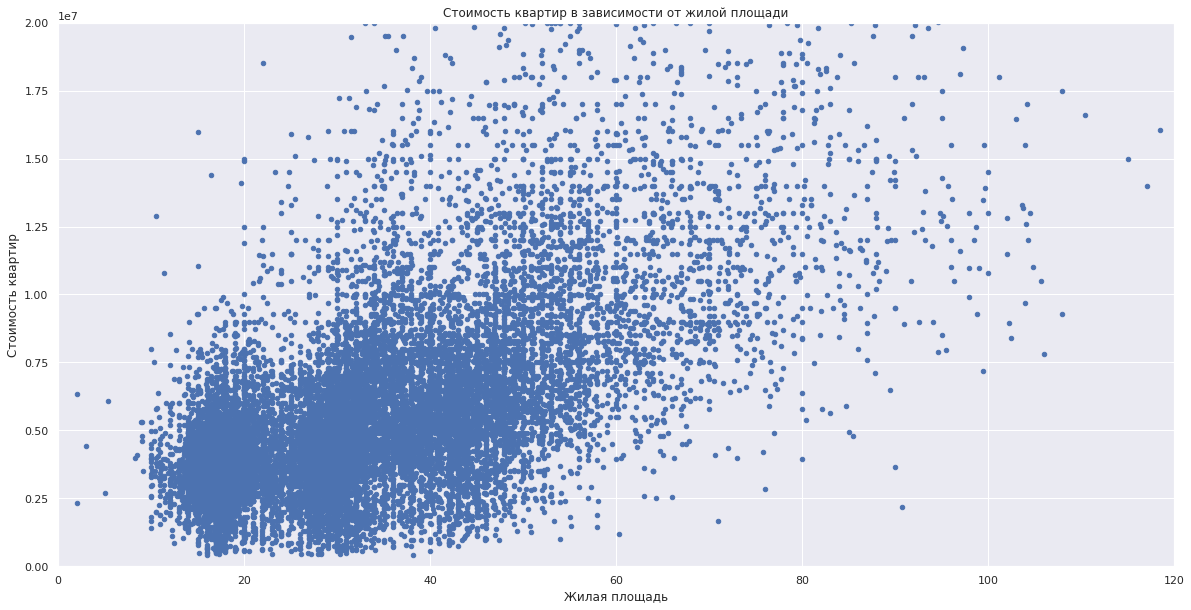

In [161]:
#проверяем взаимосвязнь цены с жилой площадью
data.plot(x='living_area', y='last_price', kind='scatter', xlim=(0, 120),ylim=(0, 20000000), grid=True)
plt.title('Cтоимость квартир в зависимости от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость квартир')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


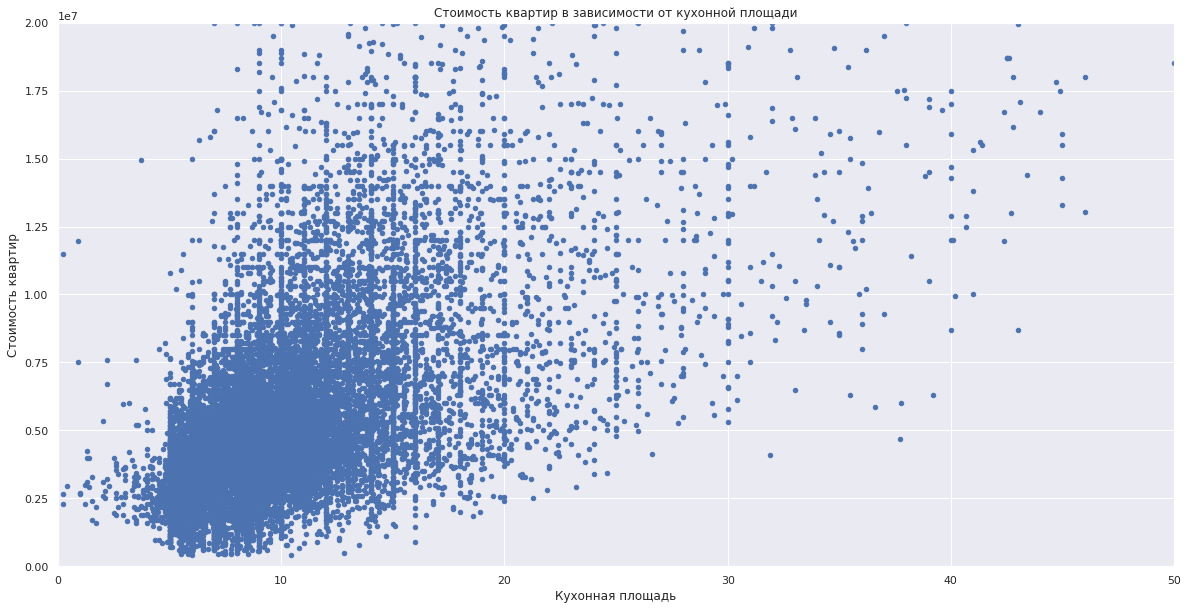

In [162]:
#проверяем взаимосвязнь цены с жилой площадью, исключили из рассмотрения студии с нулевой кухонной площадью
data[data['kitchen_area']!=0].plot(x='kitchen_area', y='last_price', kind='scatter',xlim=(0, 50),ylim=(0, 20000000), grid=True)
plt.title('Cтоимость квартир в зависимости от кухонной площади')
plt.xlabel('Кухонная площадь')
plt.ylabel('Стоимость квартир')
plt.show()

In [163]:
#коэффициент корреляции
data_corr = data[['total_area','living_area','kitchen_area','last_price']]
corr = data_corr.corr()
corr 

,total_area,living_area,kitchen_area,last_price
total_area,1.000000,0.918878,0.566480,0.712108
living_area,0.918878,1.000000,0.321322,0.590453
kitchen_area,0.566480,0.321322,1.000000,0.554287
last_price,0.712108,0.590453,0.554287,1.000000


<AxesSubplot:>

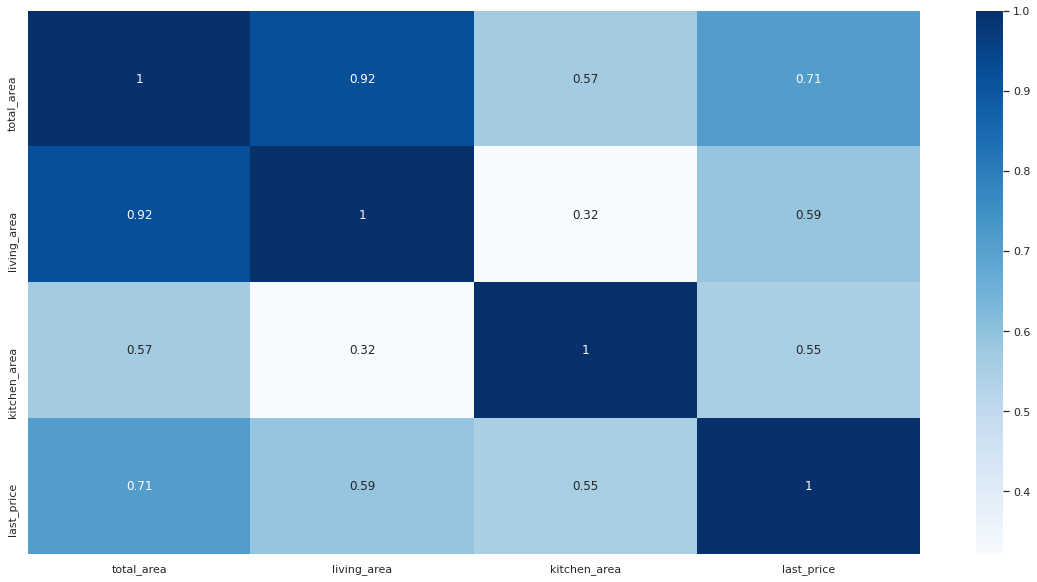

In [164]:
sns.heatmap(corr, cmap='Blues',annot=True)

<div class="alert alert-block alert-success">

**Вывод**
    
По построенным столбчатым диаграммам можно сделать вывод, что взаимосвязи между стоимостью квартиры и днем/месяцем публикации нет.
    
Не наблюдается взаимосвязь и между стоимостью квартиры и категорией этажа, но можно отметить то, что квартиры, расположенные на этажах, отличных от первого и последнего, стоят дороже.

Зато по диаграмме "стоимость квартиры-год публикации" можно заметить, что максимальная стоимость квартир была в 2014 году, далее до 2017 года стоимость квартир снижалась и только чуть-чуть начала подрастать к 2019. Это как раз связано с политической ситуацией в стране.

Яркая взаимосвязь прослеживается для "стоимость квартиры-количество комнат". Посмотрев на гистограмму, можно сделать вывод, что с увеличением количества комнат стоимость квартиры также растет.
    
Сильная взаимосвязь наблюдается и у следующей пары "стоимость квартиры-общая площадь", они имеют положительную корреляцию. Из логических соображений можно предложить, что с увеличением площади увеличивается и стоимость квартиры.

Менее выраженная взаимосвязь между стоимостью квартиры и жилой/кухонной площадью. Думаю это связано с тем, что общая площадь не для всех квартир делится в одинаковом соотношении, а для сегмента элитного жилья может принимать совершенно непредсказуемые значения, поэтому на диаграмме рассеяния и наблюдается линейная зависимость примерно до 20 кв.м для кухонных площадей и до 60 кв.м. для жилой. Для студий, например, кухонная площадь может равняться 0. Но в целом можно сказать, что с увеличением жилой/кухонной площади, увеличивается и стоимость квартиры.

</div>


### Общий вывод

<div style="border:solid black 1px; padding: 20 px">📝Работа над проектом включает следующие этапы:

1) Обзор исходных данных (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах).

2) Предобработка данных:

 - заполнение пропусков данных в столбцах `locality_name`, `is_apartment`, `balcony`, `ponds_around3000`, `parks_around3000`, `kitchen_area`, `living_area` и  `ceiling_height` ;
 
 - изменение типов данных;
    
 - удаление явных дубликатов в таблице и неявных в столбце `locality_name`;
    
 - обработка аномальных значений в столбцах - `kitchen_area`, `living_area`, `ceiling_height`, `airports_nearest`, `last_price`, `balcony`, `floors_total`.
    
3) Добавление в датафрейм новых столбцов, содержащих информацию:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

4) Иccледование интересующих зависимостей.</div>
    
<p></p>   

<div style="border:solid green 2px; padding: 20 px">Исследование данных показало, что:
    
1) *Половина квартир продается в течение 95 дней, большая часть квартир продается до 230 дней.
Долгой продажей условились считать продажу, которая длится больше 300 дней, быстрой - до 150 дней.* 
    
2) *Наибольшая цена 1 кв.м. наблюдается в Санкт-Петербурге - 111815 руб. В топ-10 по стоимости 1кв.м. жилья входят следующие города: Санкт-Петербург, поселок Мурино, деревня Кудрово, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, Выборг.*
    
3) *По диаграмме "расстояние до центра-средняя стоимость недвижимости" был сделан вывод, что с увеличением расстояния от центра средняя стоимость уменьшается.*
    
4) *Сильное влияние на общую стоимость недвижимости оказывает общая площадь и количество комнат.*
    
*Также влияют на стоимость жилая и кухонная площадь, но данная взаимосвязь прослеживается чуть менее явно. Скорее всего это, связано с тем, что общая площадь может делиться в разных соотношениях на жилую и кухонную, особенно в сегменте жилья отличного от эконом-класса, что как раз заметно по диаграмме рассеяния (линейная зависимость наблюдается до определенного значения площади, дальше идет разброс значений).*
    
*По построенной столбчатой диаграмме зависимости цены от года публикации было отмечено, что политическая ситуация также оказывает влияние на стоимость жилья.*
